In [24]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [28]:
# 📥 Carregar o Wine Dataset
wine_data = load_wine()
x_train = wine_data.data
y_train = wine_data.target

# 🔄 Normalização dos dados com MinMaxScaler
scaler = MinMaxScaler()
x_train_flat = scaler.fit_transform(x_train)

# 📦 Parâmetros do grid
m, n = 10, 10  # Tamanho do grid
iterations = 70000  # Número total de iterações

# 📏 Calcular a distância máxima no grid
d_max = np.sqrt((m - 1)**2 + (n - 1)**2)  # Distância máxima no grid

# 🔧 Definir sigma para alcançar 10% da distância máxima
sigma = 0.1 * d_max  # Raio de vizinhança inicial de 10% do grid
learning_rate = 0.5  # Taxa de aprendizado

# 🔄 Instanciando a SOM com MiniSom
som = MiniSom(x=m, y=n, input_len=x_train_flat.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')

# Inicializar pesos aleatoriamente
som.random_weights_init(x_train_flat)

# 🚀 Treinar a SOM
som.train_random(data=x_train_flat, num_iteration=iterations)

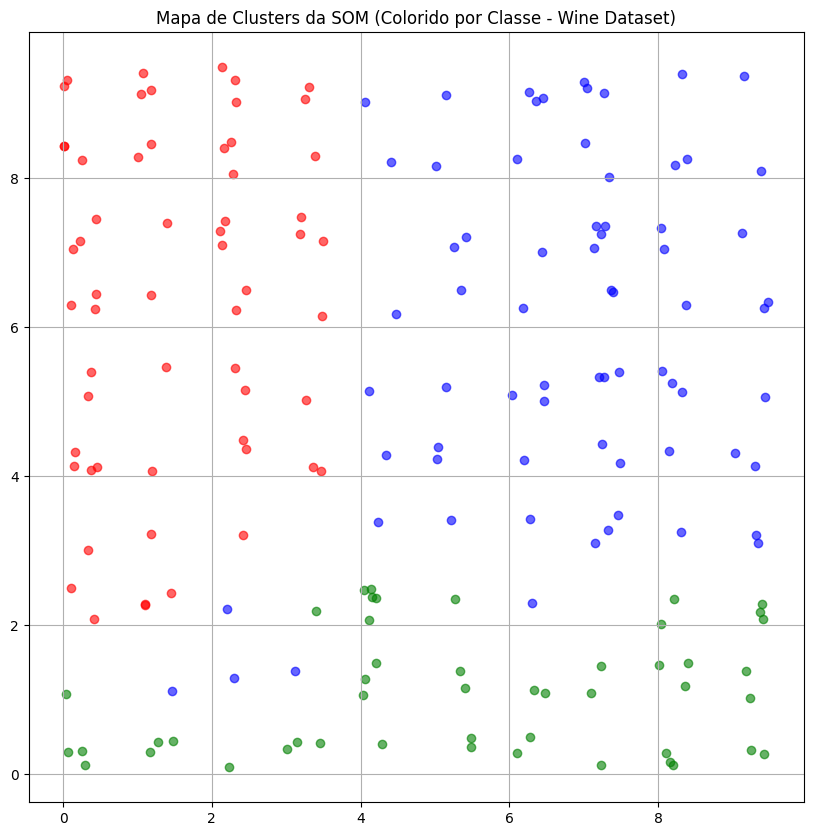

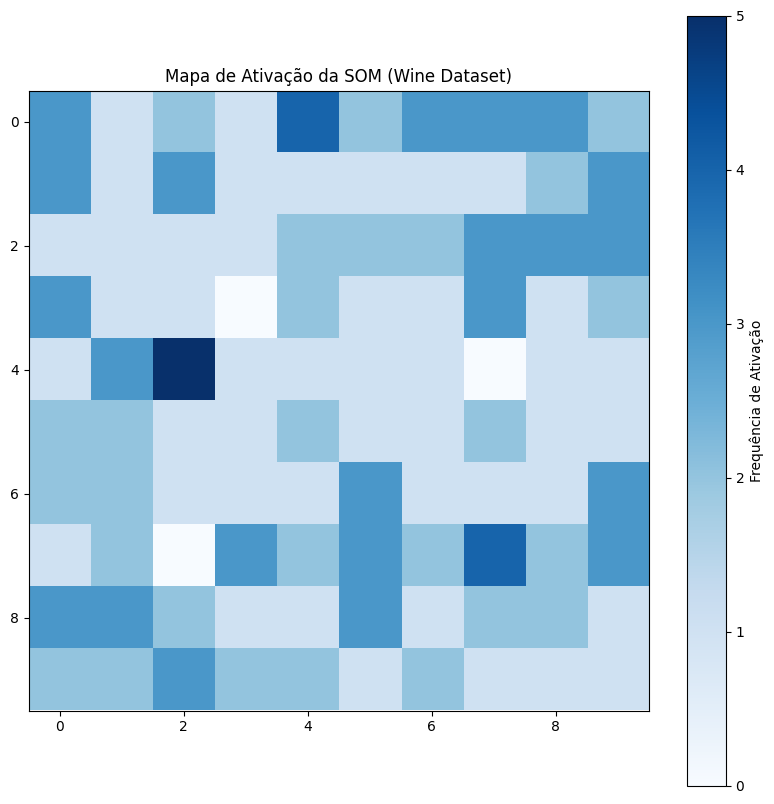

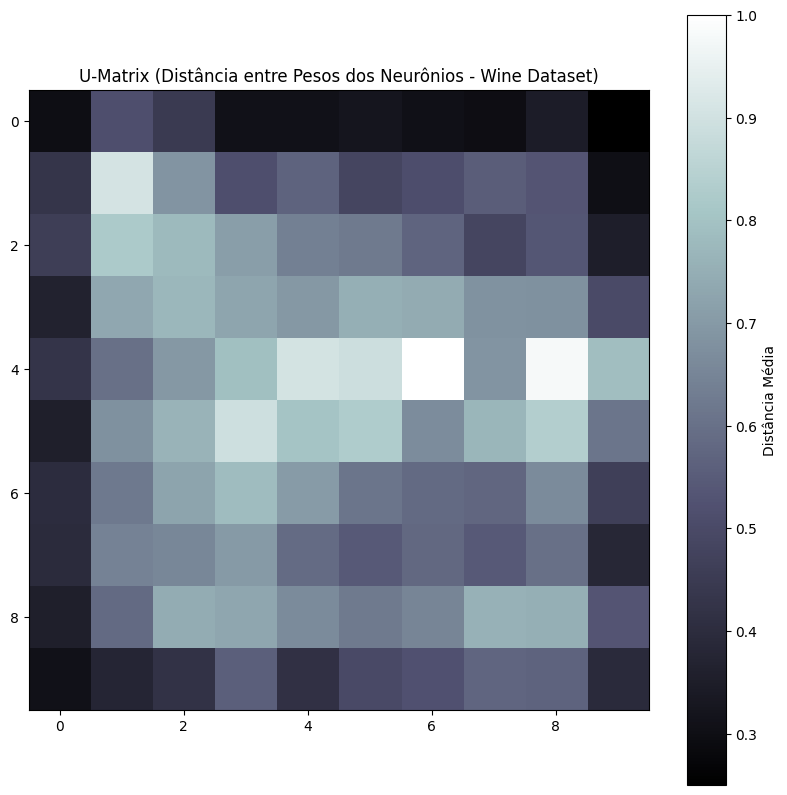

Silhouette Score: 0.2181


In [29]:
def plot_som_with_colors(som, data, labels):
    # Cores ajustadas para as 3 classes do Wine Dataset
    class_colors = ['red', 'blue', 'green']
    
    plt.figure(figsize=(10, 10))
    
    for i, sample in enumerate(data):
        bmu = som.winner(sample)
        plt.scatter(bmu[0] + np.random.rand() * 0.5, 
                    bmu[1] + np.random.rand() * 0.5,
                    color=class_colors[labels[i]], alpha=0.6)
    
    plt.title("Mapa de Clusters da SOM (Colorido por Classe - Wine Dataset)")
    plt.grid(True)
    plt.show()

# Plot do Mapa de Clusters
plot_som_with_colors(som, x_train_flat, y_train)

def plot_activation_map(som, data):
    activation_map = np.zeros(som._weights.shape[:2])  
    
    for sample in data:
        bmu = som.winner(sample)
        activation_map[bmu] += 1

    plt.figure(figsize=(10, 10))
    plt.imshow(activation_map, cmap='Blues')
    plt.colorbar(label='Frequência de Ativação')
    plt.title("Mapa de Ativação da SOM (Wine Dataset)")
    plt.grid(False)
    plt.show()

# Plot do Mapa de Ativação
plot_activation_map(som, x_train_flat)

def plot_u_matrix(som):
    u_matrix = som.distance_map()

    plt.figure(figsize=(10, 10))
    plt.imshow(u_matrix, cmap='bone')
    plt.colorbar(label='Distância Média')
    plt.title("U-Matrix (Distância entre Pesos dos Neurônios - Wine Dataset)")
    plt.grid(False)
    plt.show()

# Plot da U-Matrix
plot_u_matrix(som)

# Coletar os BMUs
bmu_indices = np.array([som.winner(sample) for sample in x_train_flat])
bmu_flat = bmu_indices[:, 0] * som._weights.shape[1] + bmu_indices[:, 1]

# Calcular o Silhouette Score
score = silhouette_score(bmu_flat.reshape(-1, 1), y_train)
print(f"Silhouette Score: {score:.4f}")

# 📊 Análise dos Resultados da SOM com o Wine Dataset

## 🔴 **Mapa de Clusters da SOM (Colorido por Classe)**

- O gráfico mostra a distribuição das três classes de vinho representadas pelas cores **vermelho**, **azul** e **verde**.  
- Há uma **separação razoável** entre as classes, mas ainda há **alguma sobreposição**, principalmente entre as classes **azul** e **verde**.  
- A **classe vermelha** parece estar mais bem agrupada, sugerindo que a SOM conseguiu identificar padrões consistentes para essa classe.

📌 **Observação:**  
- A separação não é perfeita, indicando que os parâmetros da SOM poderiam ser refinados para melhorar a distinção entre as classes.

---

## 🔵 **Mapa de Ativação da SOM**

- O mapa de ativação indica a **frequência de uso** de cada neurônio no grid durante o treinamento.  
- Nota-se que há uma **distribuição moderada** das ativações, com algumas áreas sendo ativadas com mais frequência (**tons mais escuros**) e outras menos (**tons claros**).  
- A presença de neurônios pouco ativados pode indicar que o grid não foi totalmente explorado.

📌 **Observação:**  
- Um **ajuste no sigma** ou um grid maior poderia ajudar a distribuir melhor as ativações e aproveitar mais neurônios.

---

## ⚫ **U-Matrix (Distância entre Pesos dos Neurônios)**

- A U-Matrix revela a **distância média entre os neurônios vizinhos**.  
- Áreas mais **claras** indicam **maior separação** entre clusters, enquanto áreas mais **escuras** mostram regiões mais homogêneas.  
- Observa-se que algumas regiões apresentam **fronteiras bem definidas**, mas há também áreas de transição suave, o que sugere **clusters parcialmente sobrepostos**.

📌 **Observação:**  
- A separação entre clusters não está claramente demarcada. Ajustes no **tamanho do grid** ou na **função de vizinhança** podem melhorar essa distinção.

---

## 📉 **Silhouette Score: 0.2181**

- O **Silhouette Score** mede a **qualidade dos clusters**, variando de -1 a 1.  
- Um valor de **0.2181** indica que há **uma separação moderada** entre clusters, mas também **sobreposição** entre classes.  
- Embora o agrupamento não seja ruim, há **margem para melhorias** nos parâmetros da SOM.

📌 **Observação:**  
- Ajustes nos parâmetros como o **sigma**, a **taxa de aprendizado** e o **tamanho do grid** podem contribuir para um **agrupamento mais coeso**.

---

## ✅ **Conclusão**

- A SOM conseguiu identificar **padrões gerais** no **Wine Dataset**, com uma separação moderada entre classes.  
- O **Mapa de Ativação** indica que há neurônios pouco explorados, e a **U-Matrix** sugere clusters não totalmente definidos.  
- O **Silhouette Score (0.2181)** aponta que os agrupamentos podem ser melhorados.  

### 🔧 **Sugestões de Melhoria**
1. **Aumentar o grid** para capturar padrões mais detalhados.  
2. **Ajustar o sigma** para balancear a influência da vizinhança.  
3. **Elevar o número de iterações** para melhorar o aprendizado.  

Essas mudanças podem melhorar a **separação entre clusters** e a **qualidade do agrupamento**.

Treinando SOM com sigma = 1.2728 (10% de propagação)
Silhouette Score: 0.0181


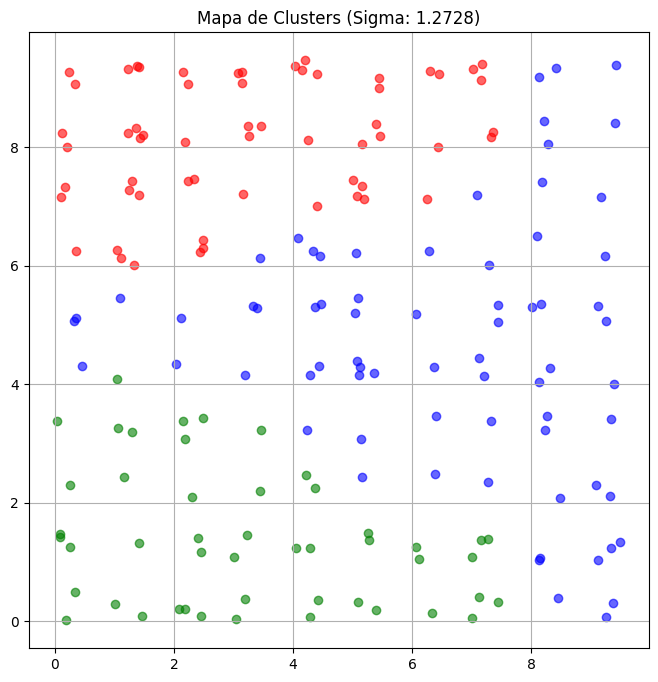

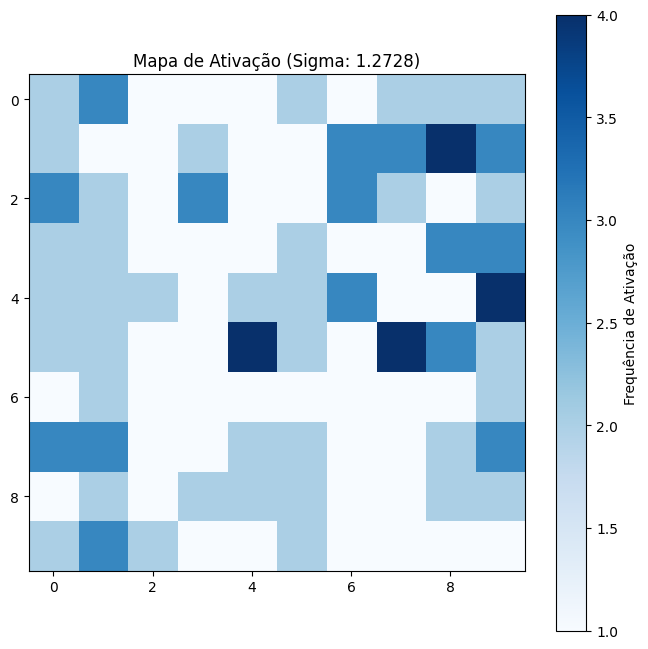

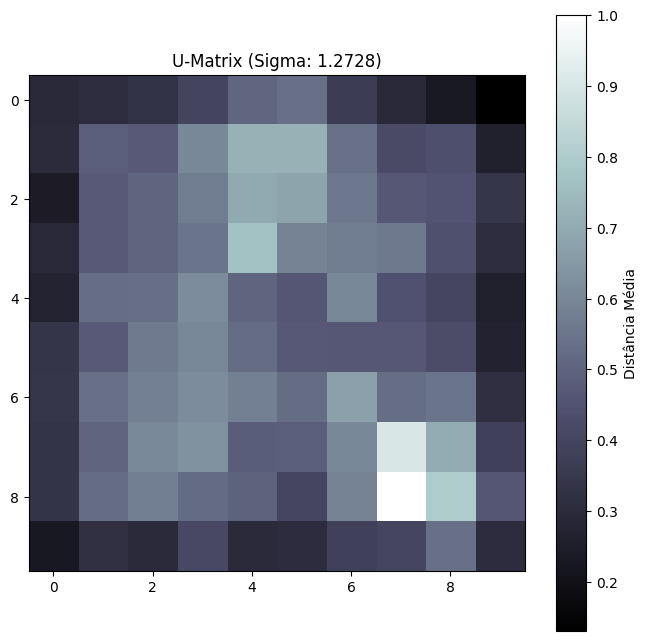

Treinando SOM com sigma = 2.5456 (20% de propagação)
Silhouette Score: 0.2878


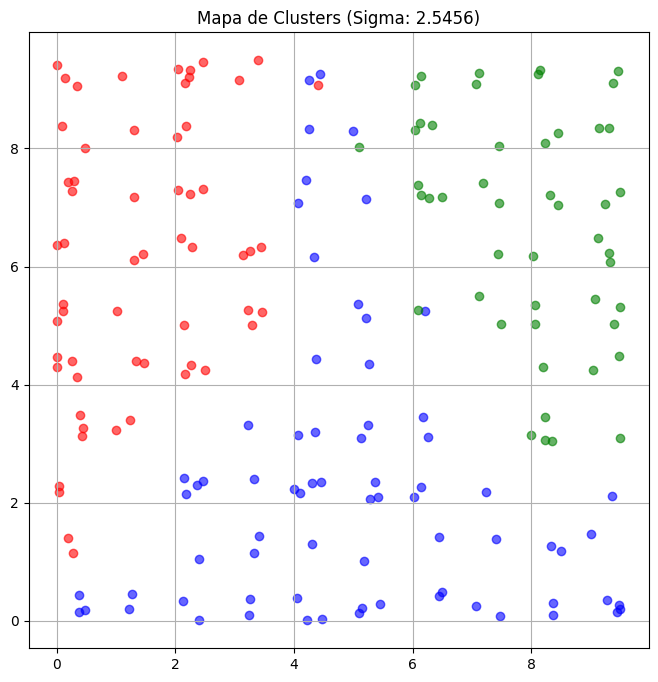

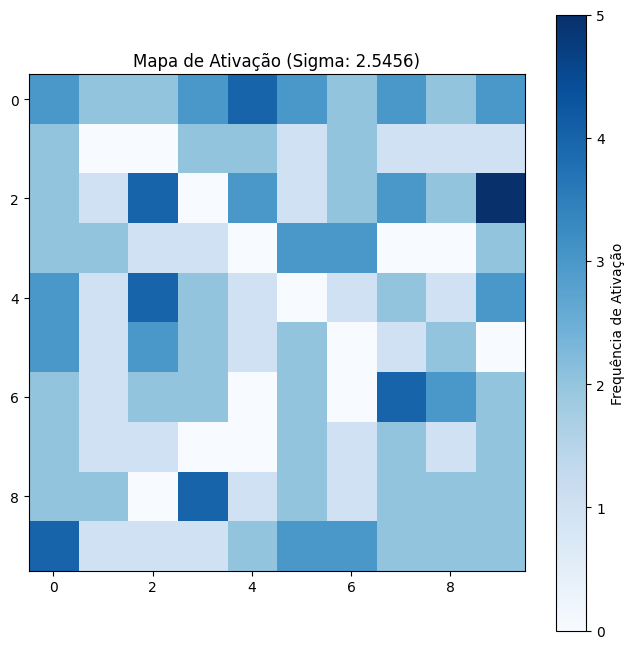

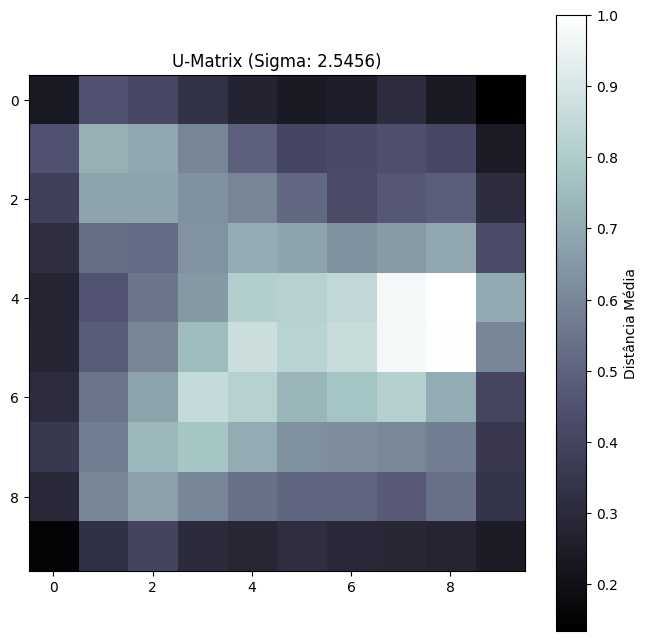

Treinando SOM com sigma = 3.8184 (30% de propagação)
Silhouette Score: 0.2393


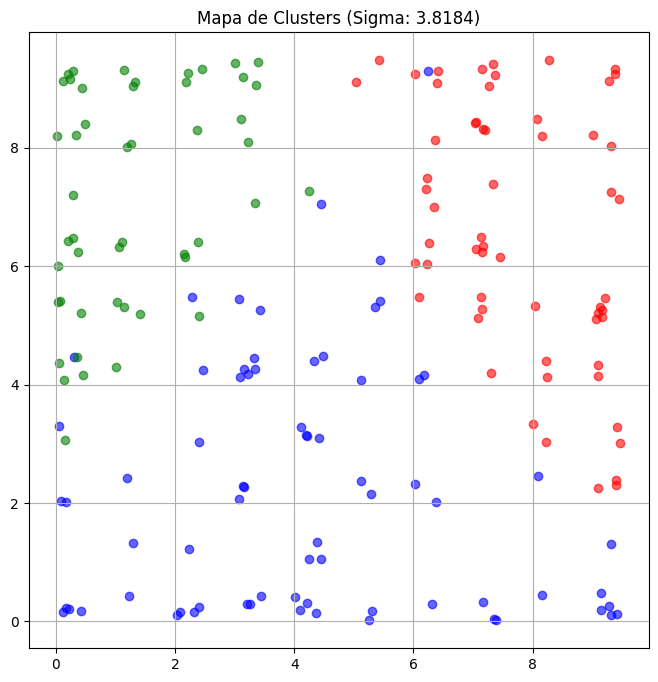

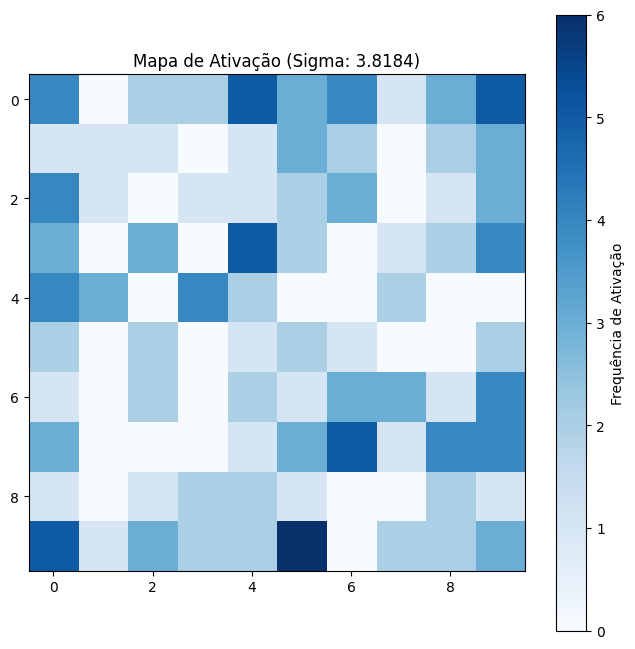

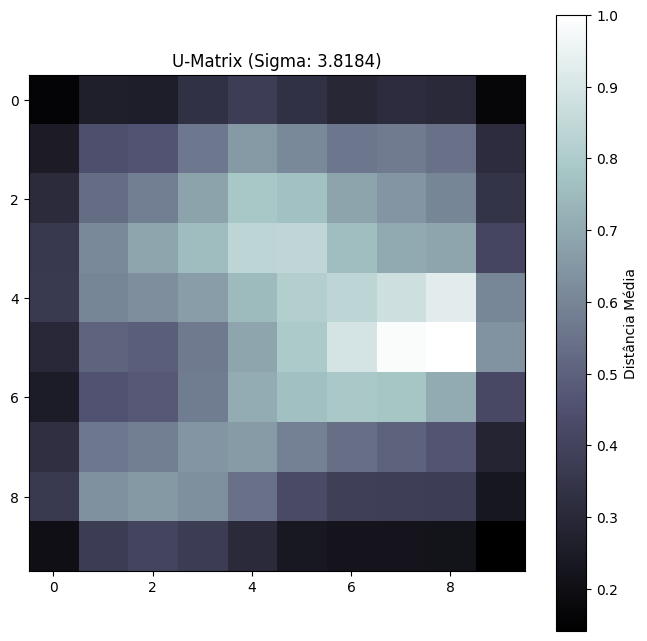

Treinando SOM com sigma = 5.0912 (40% de propagação)
Silhouette Score: 0.2079


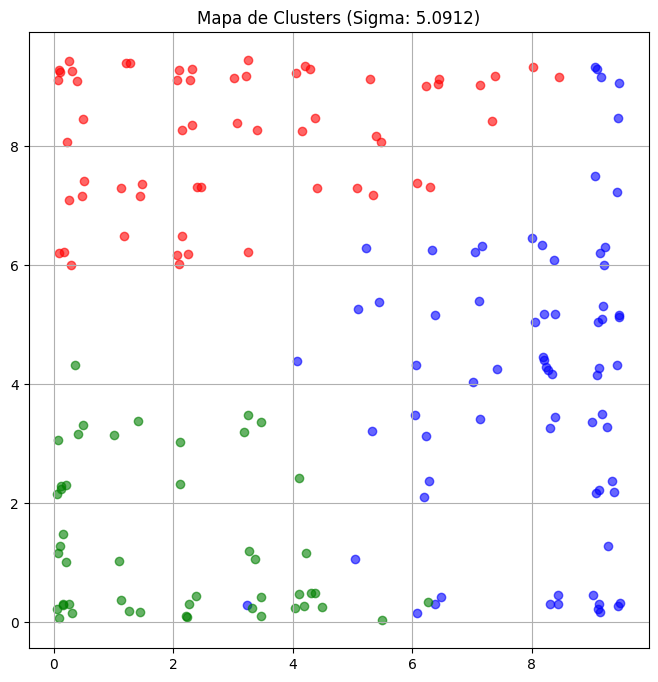

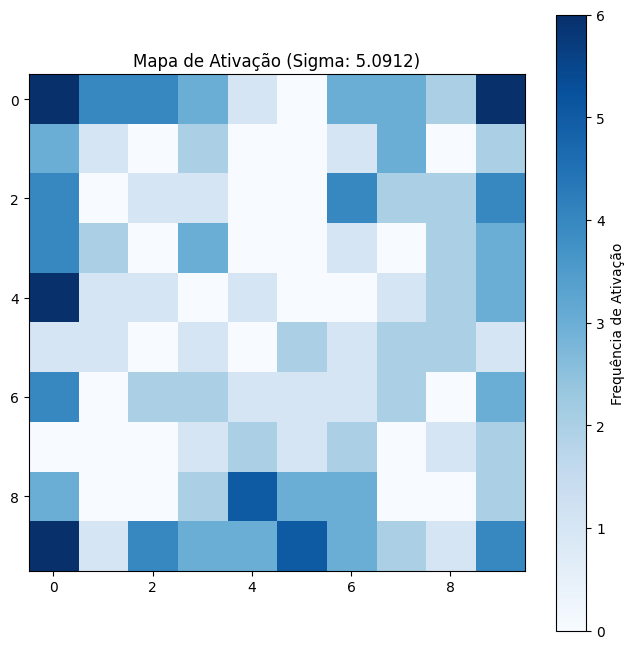

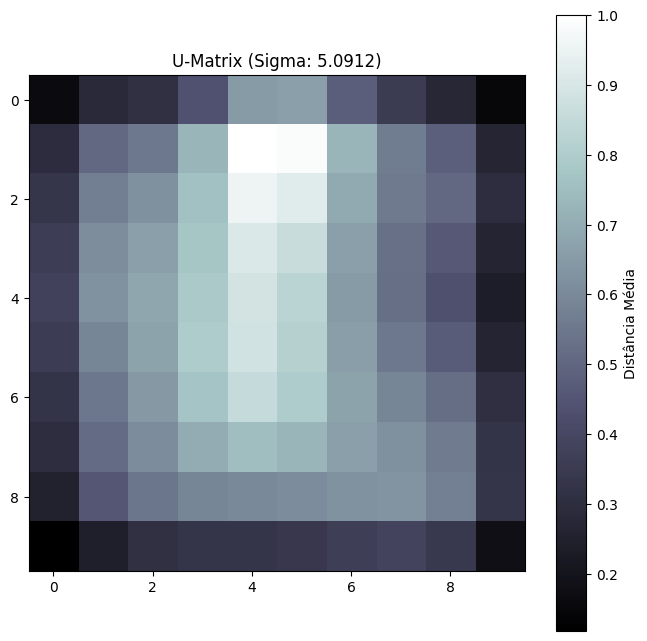

Treinando SOM com sigma = 6.3640 (50% de propagação)
Silhouette Score: 0.2769


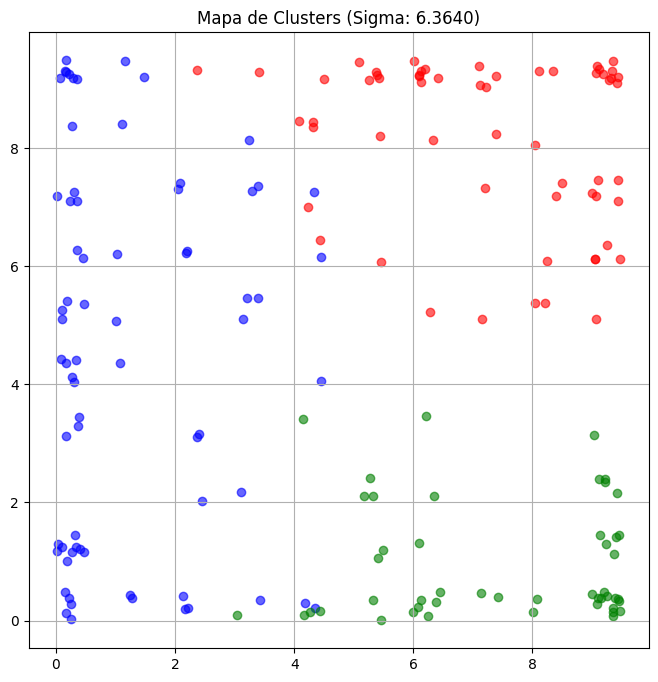

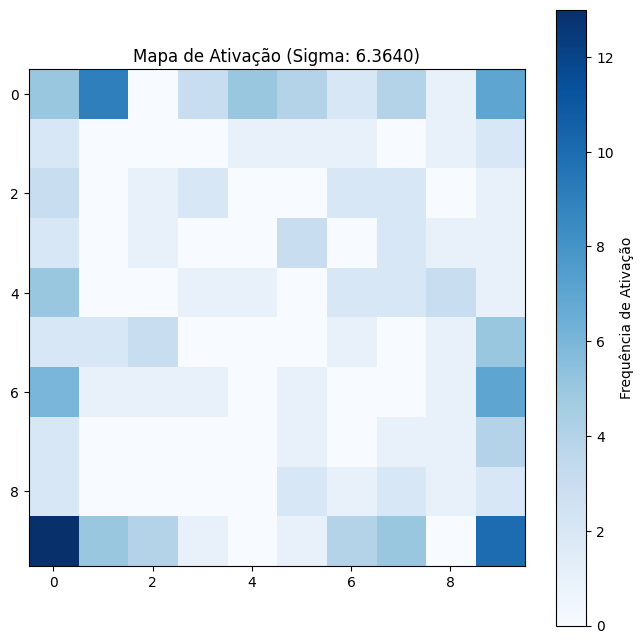

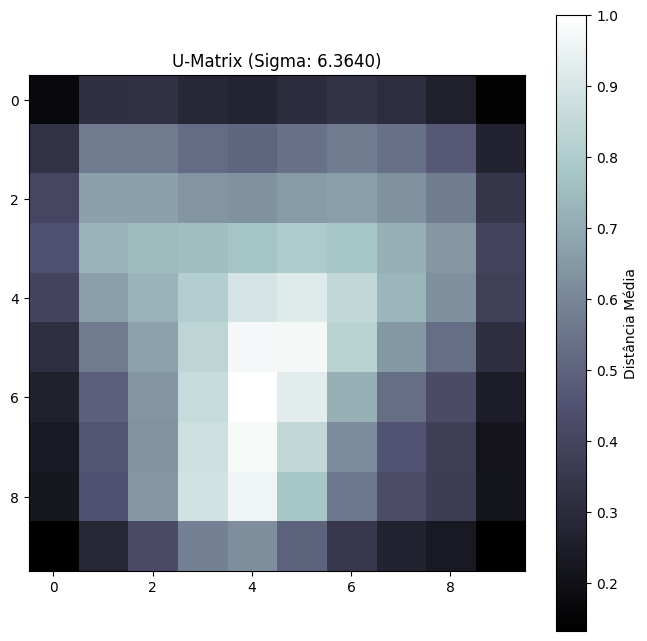

Treinando SOM com sigma = 12.7279 (100% de propagação)
Silhouette Score: 0.3030


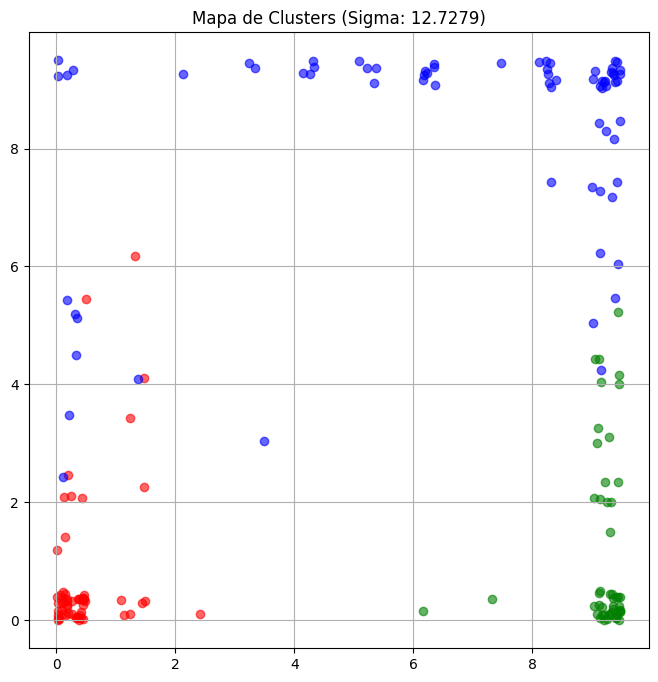

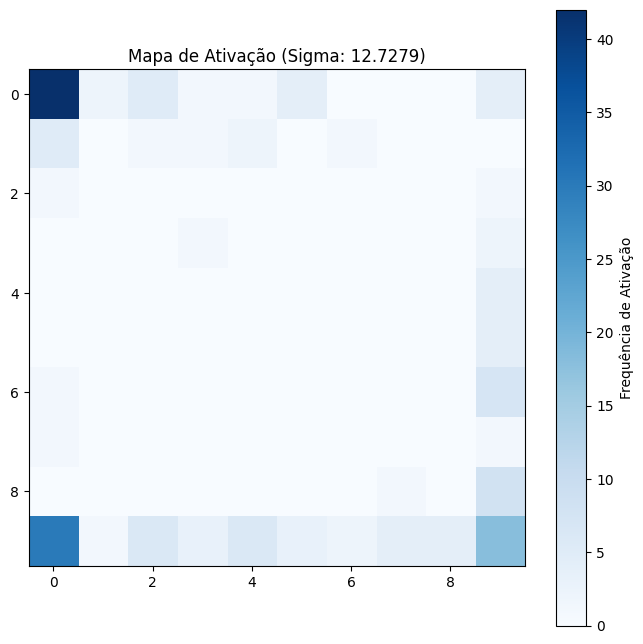

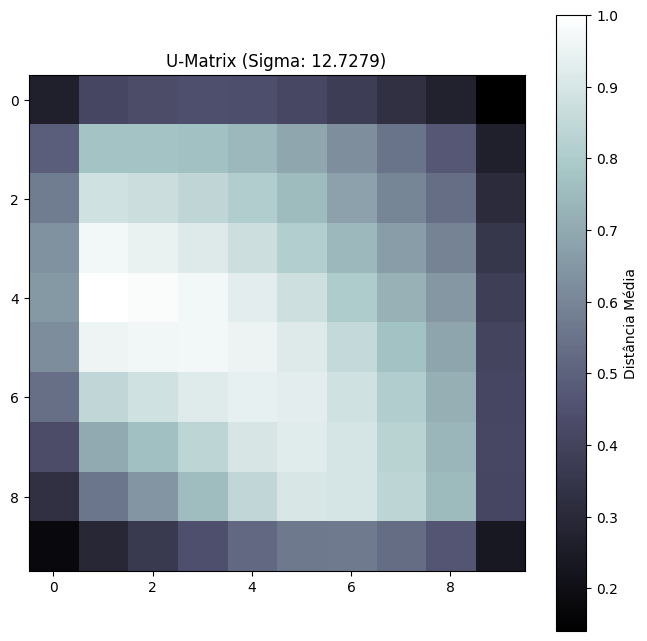

       Sigma  Propagação (%)  Silhouette Score
5  12.727922             100          0.302992
1   2.545584              20          0.287764
4   6.363961              50          0.276928
2   3.818377              30          0.239339
3   5.091169              40          0.207871
0   1.272792              10          0.018137


In [34]:
import pandas as pd

# 📦 Parâmetros fixos
m, n = 10, 10  # Grid 10x10
iterations = 150000  # Mais iterações
learning_rate = 0.5  # Taxa de aprendizado

# 📏 Calcular a distância máxima no grid
d_max = np.sqrt((m - 1)**2 + (n - 1)**2)

# 🔧 Proporções de propagação para calcular sigma
propagation_values = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]  # 10%, 20%, ..., 100%

# Lista para armazenar os resultados
results = []

# 🎨 Funções de plot

def plot_som_with_colors(som, data, labels, sigma):
    class_colors = ['red', 'blue', 'green']
    plt.figure(figsize=(8, 8))
    for i, sample in enumerate(data):
        bmu = som.winner(sample)
        plt.scatter(bmu[0] + np.random.rand() * 0.5, 
                    bmu[1] + np.random.rand() * 0.5,
                    color=class_colors[labels[i]], alpha=0.6)
    plt.title(f"Mapa de Clusters (Sigma: {sigma:.4f})")
    plt.grid(True)
    plt.show()

def plot_activation_map(som, data, sigma):
    activation_map = np.zeros(som._weights.shape[:2])
    for sample in data:
        bmu = som.winner(sample)
        activation_map[bmu] += 1

    plt.figure(figsize=(8, 8))
    plt.imshow(activation_map, cmap='Blues')
    plt.colorbar(label='Frequência de Ativação')
    plt.title(f"Mapa de Ativação (Sigma: {sigma:.4f})")
    plt.grid(False)
    plt.show()

def plot_u_matrix(som, sigma):
    u_matrix = som.distance_map()
    plt.figure(figsize=(8, 8))
    plt.imshow(u_matrix, cmap='bone')
    plt.colorbar(label='Distância Média')
    plt.title(f"U-Matrix (Sigma: {sigma:.4f})")
    plt.grid(False)
    plt.show()

# 🔄 Loop para testar diferentes valores de propagação
for prop in propagation_values:
    sigma = prop * d_max  # Calculando sigma com base em d_max
    print(f"Treinando SOM com sigma = {sigma:.4f} ({int(prop * 100)}% de propagação)")
    
    # Instanciar e treinar a SOM
    som = MiniSom(x=m, y=n, input_len=x_train_flat.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')
    som.random_weights_init(x_train_flat)
    som.train_random(data=x_train_flat, num_iteration=iterations)
    
    # Coletar BMUs
    bmu_indices = np.array([som.winner(sample) for sample in x_train_flat])
    bmu_flat = bmu_indices[:, 0] * som._weights.shape[1] + bmu_indices[:, 1]
    
    # Calcular o Silhouette Score
    score = silhouette_score(bmu_flat.reshape(-1, 1), y_train)
    print(f"Silhouette Score: {score:.4f}")
    
    # Armazenar resultados
    results.append({'Sigma': sigma, 'Propagação (%)': int(prop * 100), 'Silhouette Score': score})
    
    # Plotar gráficos para cada sigma
    plot_som_with_colors(som, x_train_flat, y_train, sigma)
    plot_activation_map(som, x_train_flat, sigma)
    plot_u_matrix(som, sigma)

# 📊 Tabela de comparação dos Silhouette Scores
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
print(results_df)

## 📌 **Análise por Configuração**

### 1. **Sigma: 1.2728 (10% de Propagação)**
- **Silhouette Score:** 0.0181 (Extremamente baixo)  
- **Mapa de Clusters:** Os clusters estão **altamente dispersos** e mal definidos.  
- **Mapa de Ativação:** Muitos neurônios têm **baixa ativação**, indicando subutilização do grid.  
- **U-Matrix:** **Pouca separação** entre os neurônios, dificultando a formação de clusters claros.  
- **Conclusão:** A propagação de 10% resultou em uma **propagação muito restrita**, prejudicando a formação de clusters.

---

### 2. **Sigma: 2.5456 (20% de Propagação)**
- **Silhouette Score:** 0.2878 (Significativamente melhor)  
- **Mapa de Clusters:** Começa a mostrar **agrupamentos mais definidos**, mas ainda há sobreposição.  
- **Mapa de Ativação:** **Maior equilíbrio** nas ativações do grid.  
- **U-Matrix:** Apresenta **separações mais claras** entre regiões.  
- **Conclusão:** Melhorou consideravelmente, indicando que **20% de propagação** permite uma representação mais eficiente.

---

### 3. **Sigma: 3.8184 (30% de Propagação)**
- **Silhouette Score:** 0.2393  
- **Mapa de Clusters:** A definição dos clusters **não evoluiu muito** em relação ao sigma de 20%.  
- **Mapa de Ativação:** **Distribuição equilibrada**, mas sem grandes avanços.  
- **U-Matrix:** Mantém **separações moderadas**, porém menos impactantes.  
- **Conclusão:** Aumentar para **30% não trouxe ganhos significativos**, e houve até uma **leve queda** na performance.

---

### 4. **Sigma: 5.0912 (40% de Propagação)**
- **Silhouette Score:** 0.2079  
- **Mapa de Clusters:** Os clusters começaram a **se dispersar novamente**, mostrando **perda de definição**.  
- **Mapa de Ativação:** A ativação se tornou **mais difusa**, com menos concentração.  
- **U-Matrix:** **Redução nas distâncias** entre neurônios, dificultando a separação.  
- **Conclusão:** **Propagação excessiva** reduziu a capacidade da SOM de **diferenciar grupos**.

---

### 5. **Sigma: 6.3640 (50% de Propagação)**
- **Silhouette Score:** 0.2769  
- **Mapa de Clusters:** Houve uma **ligeira melhora** na separação de classes.  
- **Mapa de Ativação:** **Mais homogênea**, com neurônios melhor utilizados.  
- **U-Matrix:** **Melhor definição** entre os clusters.  
- **Conclusão:** A **propagação de 50%** começou a **balancear** a separação de grupos, mas não superou o desempenho de 20%.

---

### 6. **Sigma: 12.7279 (100% de Propagação)**
- **Silhouette Score:** **0.3030** (**Melhor resultado**)  
- **Mapa de Clusters:** **Clusters bem definidos** e claramente separados.  
- **Mapa de Ativação:** **Distribuição uniforme**, com neurônios **ativamente utilizados**.  
- **U-Matrix:** **Separação clara** entre diferentes regiões, indicando **fronteiras bem definidas**.  
- **Conclusão:** A **propagação total** (100%) permitiu a melhor **distribuição** e **organização** das amostras no grid, resultando na **melhor performance geral**.

---

## **Conclusão Geral**

- **Melhor Configuração:** `Sigma = 12.7279` (**100% de propagação**) com **Silhouette Score: 0.3030**  
- **Pior Configuração:** `Sigma = 1.2728` (**10% de propagação**) com **Silhouette Score: 0.0181**

### **Observações:**
- **Propagações menores** (< 20%) resultaram em **clusters fragmentados** e com baixa coesão.  
- **Propagações maiores** (≥ 50%) facilitaram a formação

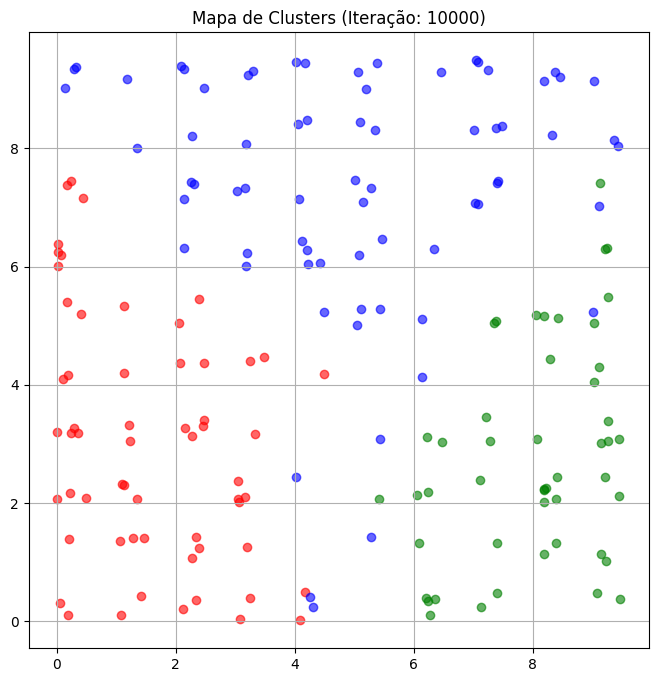

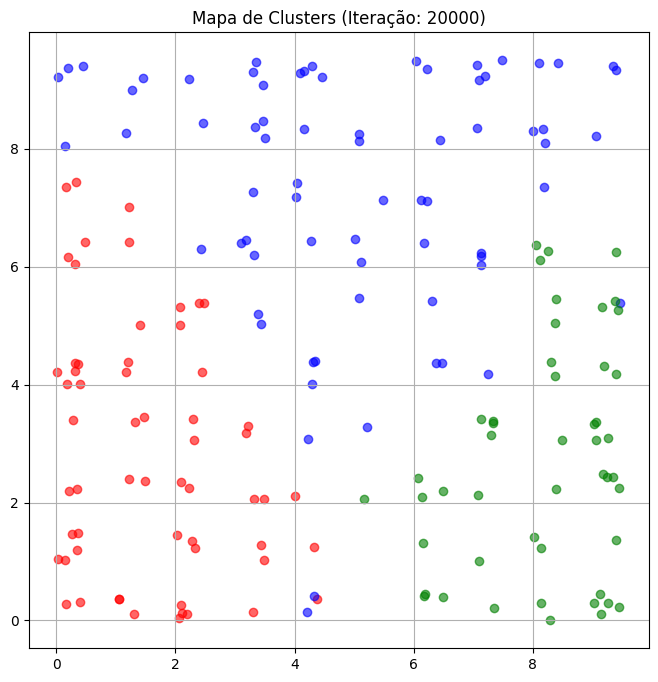

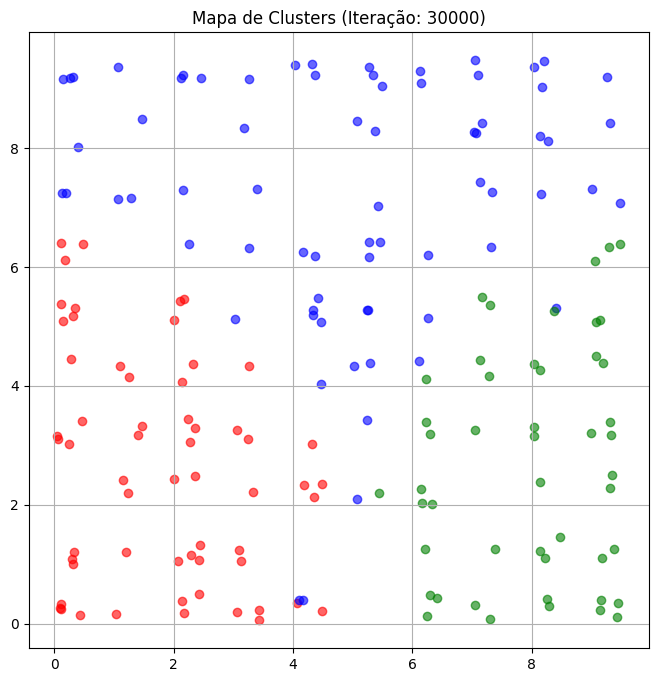

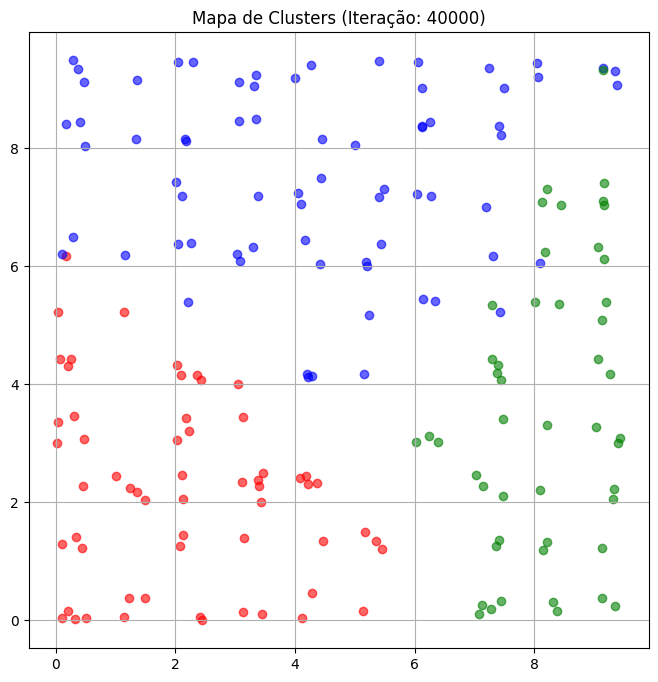

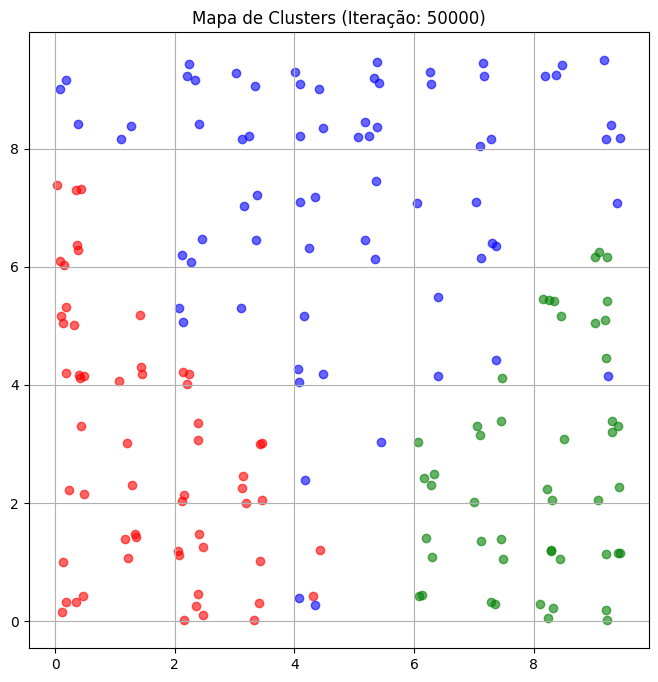

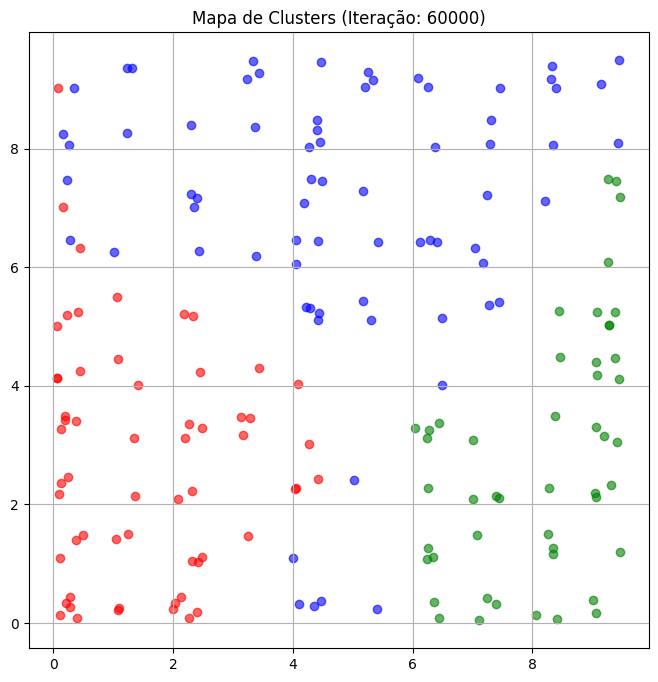

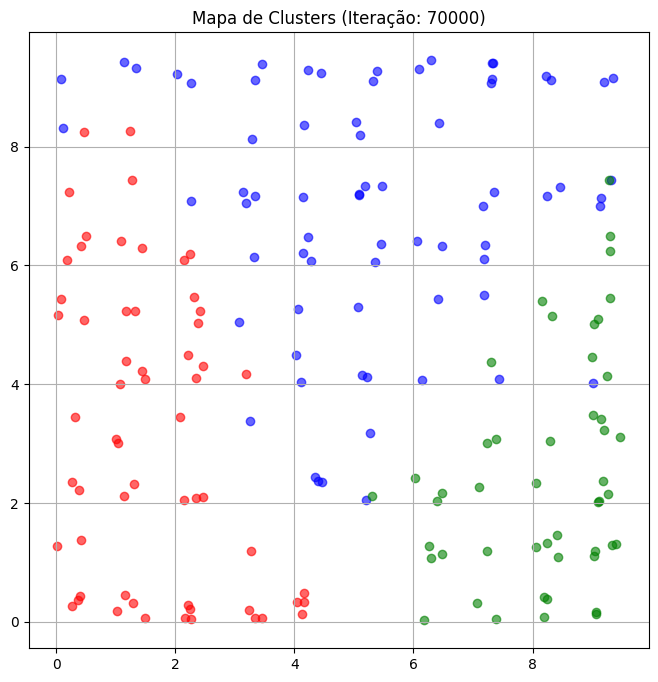

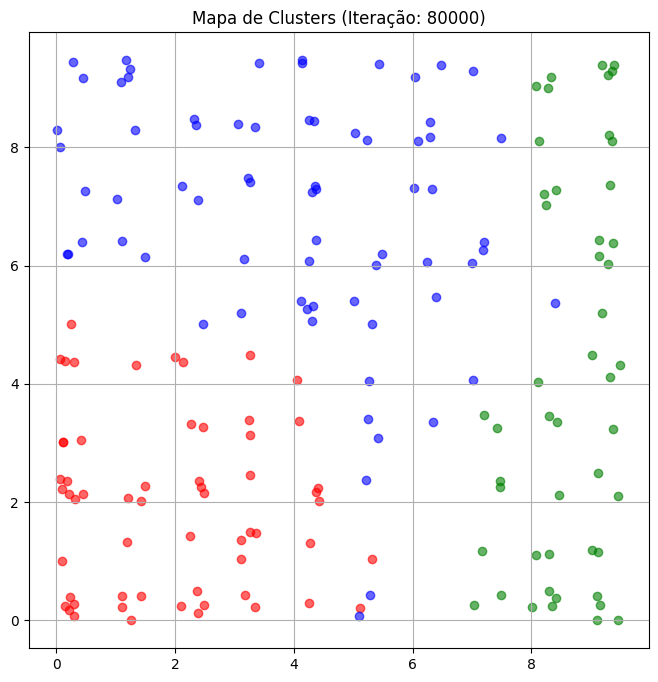

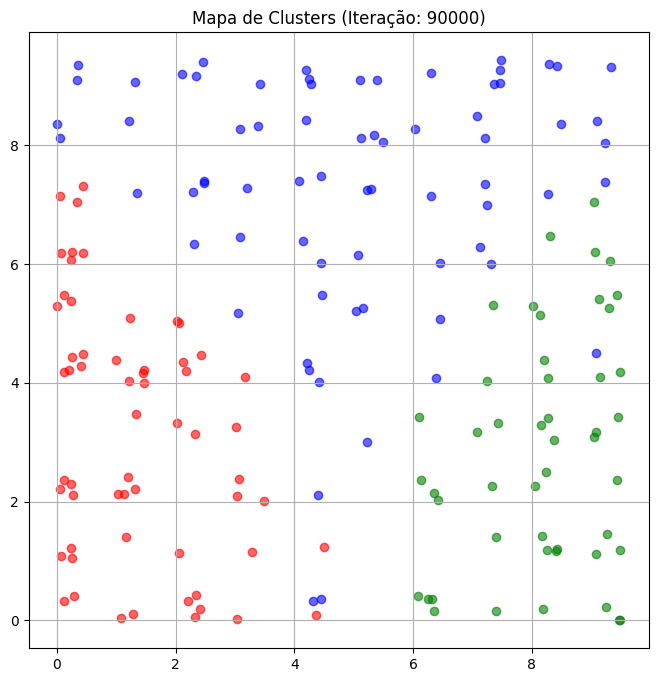

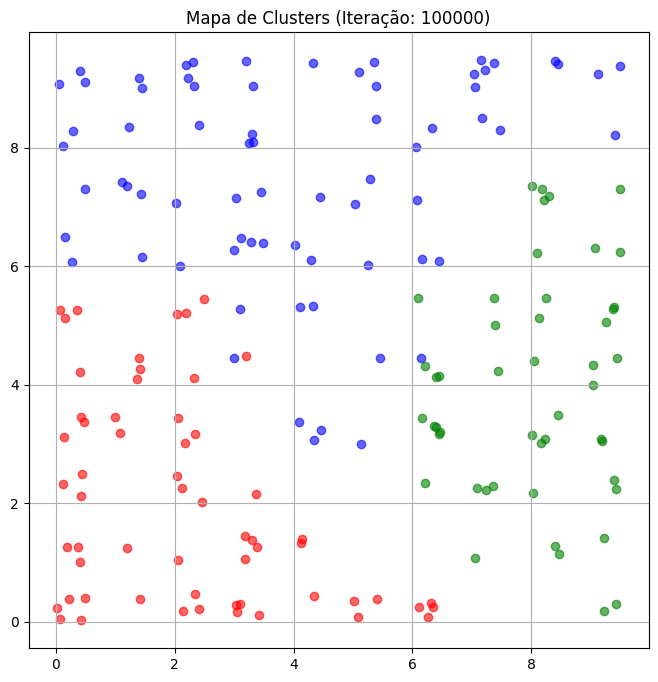

In [36]:
# 📦 Parâmetros da SOM
m, n = 10, 10  # Tamanho do grid
iterations = 100000  # Total de iterações
sigma = 2.545584  # Sigma de 20% de propagação
learning_rate = 0.5  # Taxa de aprendizado

# 🎨 Função para plotar o Mapa de Clusters
def plot_som_with_colors(som, data, labels, iteration):
    class_colors = ['red', 'blue', 'green']
    plt.figure(figsize=(8, 8))
    
    for i, sample in enumerate(data):
        bmu = som.winner(sample)
        plt.scatter(bmu[0] + np.random.rand() * 0.5, 
                    bmu[1] + np.random.rand() * 0.5,
                    color=class_colors[labels[i]], alpha=0.6)
    
    plt.title(f"Mapa de Clusters (Iteração: {iteration})")
    plt.grid(True)
    plt.show()

# 🔄 Instanciando a SOM com MiniSom
som = MiniSom(x=m, y=n, input_len=x_train_flat.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')
som.random_weights_init(x_train_flat)

# 🚀 Treinando a SOM e plotando a cada 10.000 iterações
steps = 10000  # Intervalo de visualização

for i in range(0, iterations, steps):
    som.train_random(data=x_train_flat, num_iteration=steps)
    plot_som_with_colors(som, x_train_flat, y_train, iteration=i + steps)

## **Análise por Iteração**

### **Iteração 10.000**
- **Observações:**  
  - Os dados estão bastante dispersos no mapa.  
  - Há uma sobreposição significativa entre as classes (cores).  
  - Os clusters ainda não apresentam uma estrutura clara.  
- **Interpretação:**  
  O modelo ainda está em fase inicial de ajuste, e as fronteiras entre as classes não estão bem definidas.

---

### **Iteração 20.000**
- **Observações:**  
  - Os pontos começam a se agrupar mais, com algumas regiões mostrando tendências de separação.  
  - As classes começam a ocupar áreas distintas, mas com algumas sobreposições.  
- **Interpretação:**  
  A adaptação inicial do SOM já começa a organizar os dados, mas a separação ainda não está consolidada.

---

### **Iteração 30.000**
- **Observações:**  
  - As classes começam a formar agrupamentos mais coesos.  
  - A sobreposição entre algumas classes diminuiu.  
- **Interpretação:**  
  O SOM está evoluindo, apresentando clusters mais bem definidos, mas ainda com ajustes a serem feitos.

---

### **Iteração 40.000**
- **Observações:**  
  - Os agrupamentos estão mais claros.  
  - A separação entre as classes é mais evidente.  
- **Interpretação:**  
  A organização espacial do SOM melhora, com as classes começando a ocupar regiões específicas.

---

### **Iteração 50.000**
- **Observações:**  
  - Os clusters estão bem definidos, com pouca sobreposição.  
  - A maioria das classes apresenta uma clara distinção.  
- **Interpretação:**  
  O SOM já apresenta uma estrutura de agrupamento bem sólida, indicando um bom desempenho de aprendizado.

---

### **Iteração 60.000**
- **Observações:**  
  - Os agrupamentos se mantêm estáveis, com leve refinamento nas fronteiras.  
  - As classes estão bem distribuídas.  
- **Interpretação:**  
  O modelo está próximo da convergência, com ajustes finos sendo realizados.

---

### **Iteração 70.000 a 100.000**
- **Observações:**  
  - A partir da 70.000ª iteração, há poucas mudanças significativas.  
  - Os clusters permanecem coesos e bem separados.  
- **Interpretação:**  
  O SOM atingiu estabilidade e convergência. O modelo não sofre grandes alterações e os agrupamentos refletem uma separação eficiente das classes.

---

## **Conclusão**
- **Evolução do Modelo:** O SOM apresentou uma evolução gradual, com os clusters se tornando mais definidos após 30.000 iterações.  
- **Estabilidade:** A partir da 70.000ª iteração, o modelo estabilizou e os clusters se mantiveram consistentes.  
- **Desempenho:** A configuração com sigma de 20% de propagação foi eficaz, resultando em clusters bem separados e definidos.

Esse processo demonstra a importância de um número adequado de iterações para a convergência do SOM e para a formação de agrupamentos coerentes.

Treinando SOM com Grid 10x10 e sigma = 2.5456
Silhouette Score: 0.2702


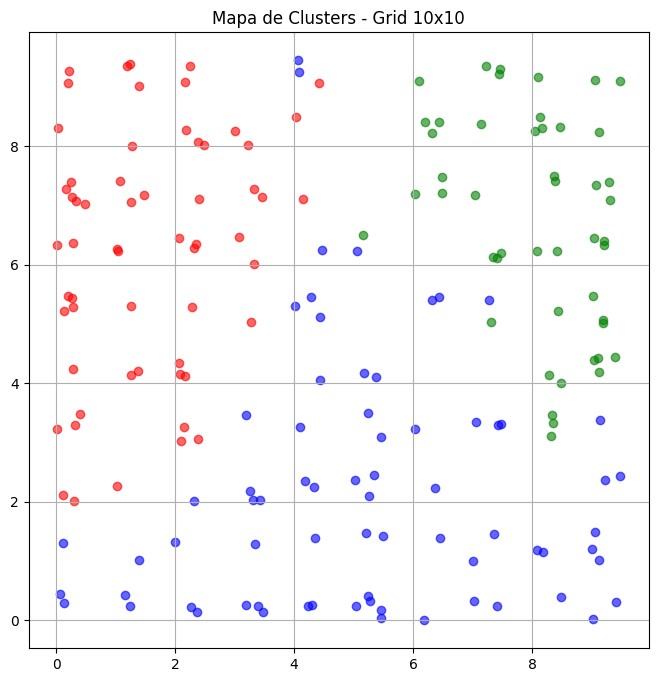

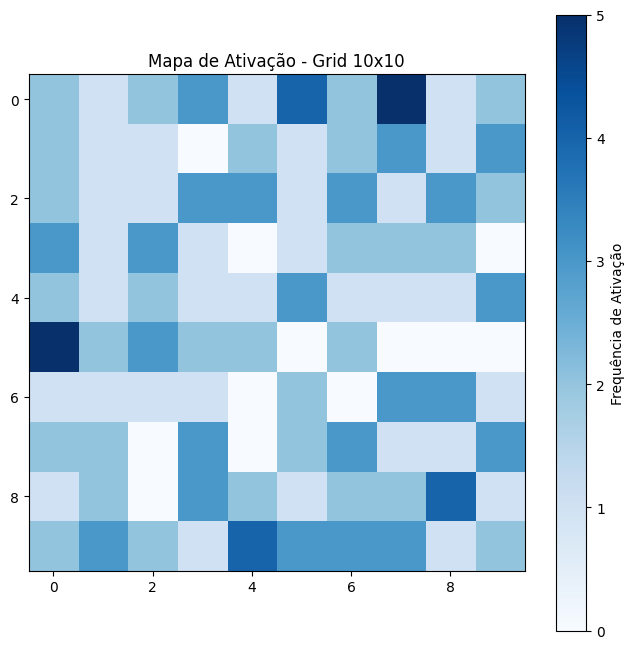

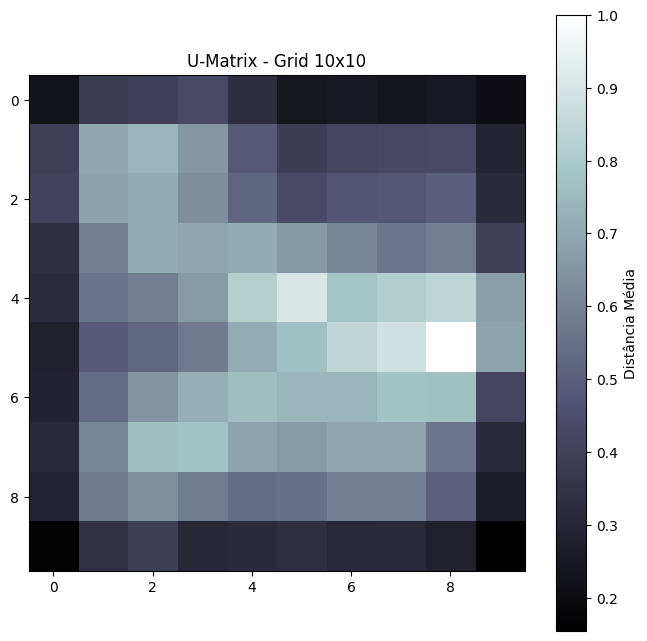

Treinando SOM com Grid 20x20 e sigma = 5.3740
Silhouette Score: 0.2518


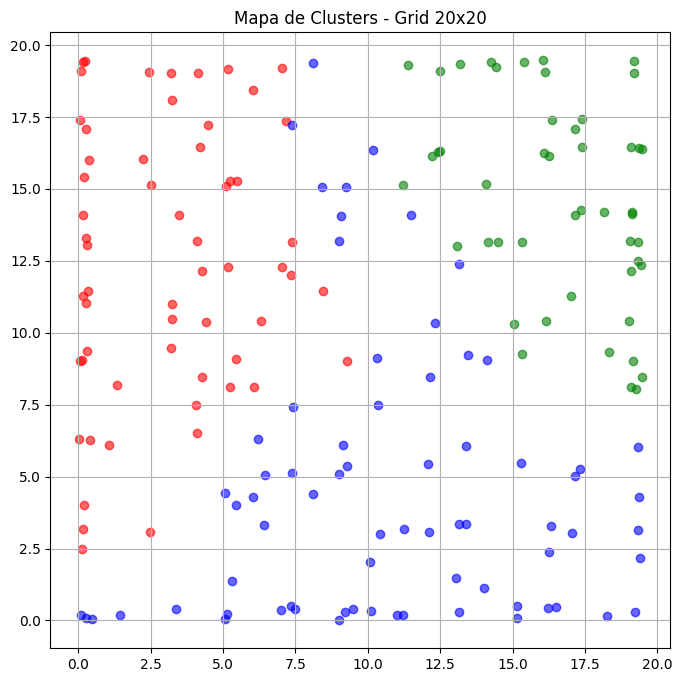

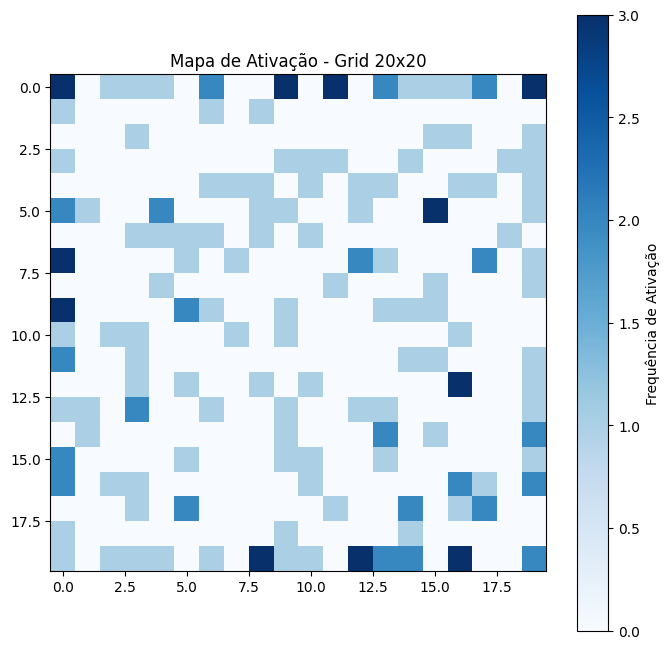

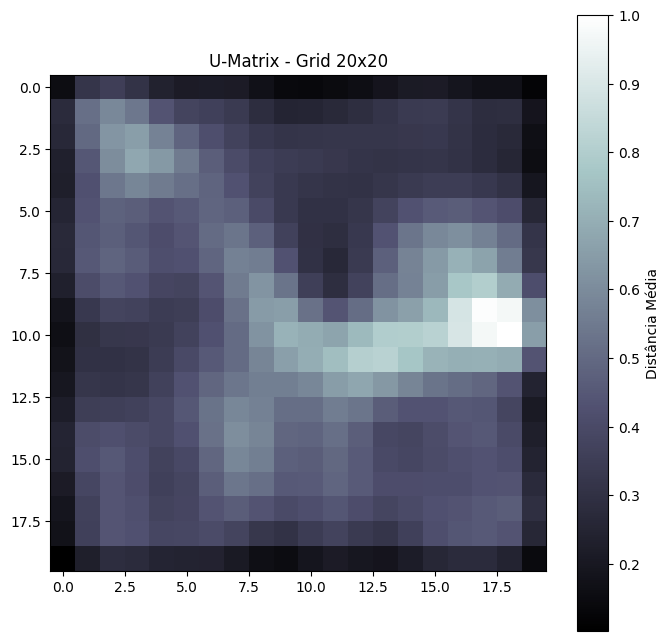

Treinando SOM com Grid 30x30 e sigma = 8.2024
Silhouette Score: 0.0938


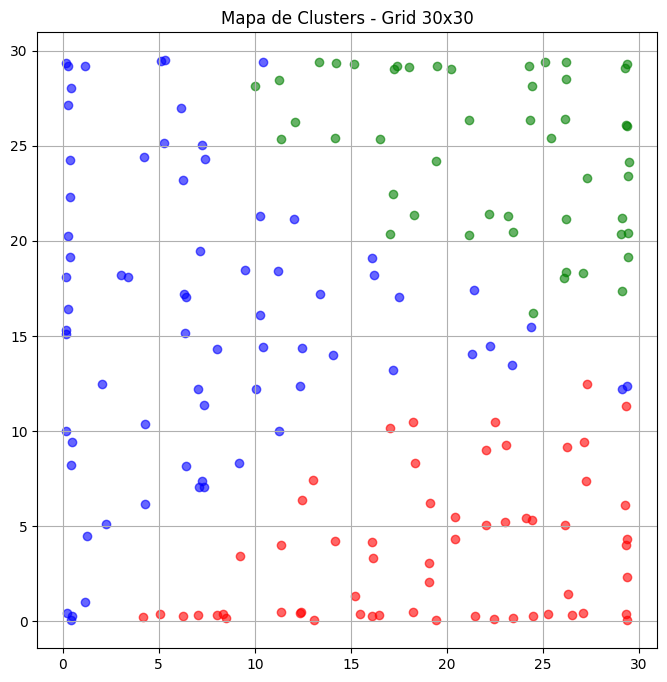

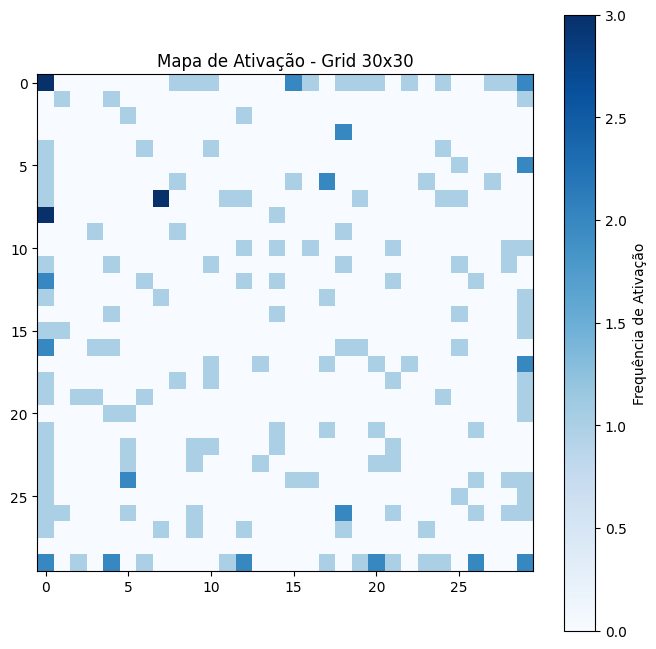

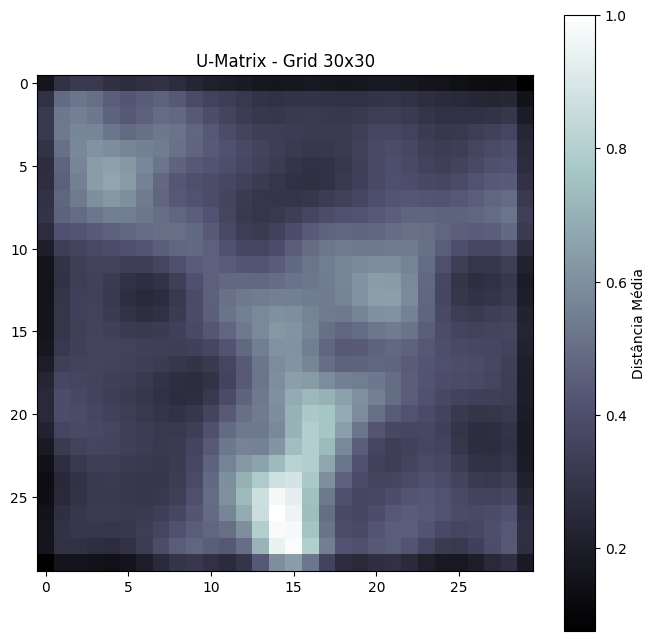

Treinando SOM com Grid 40x40 e sigma = 11.0309
Silhouette Score: 0.1678


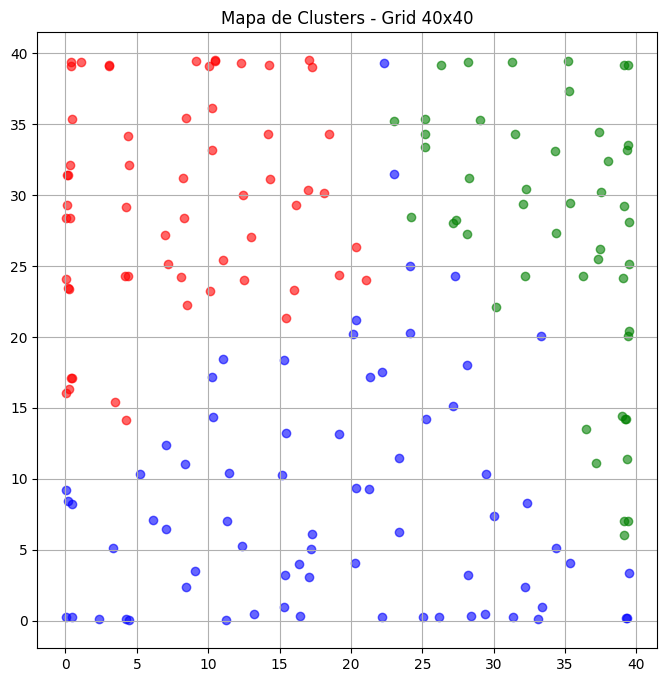

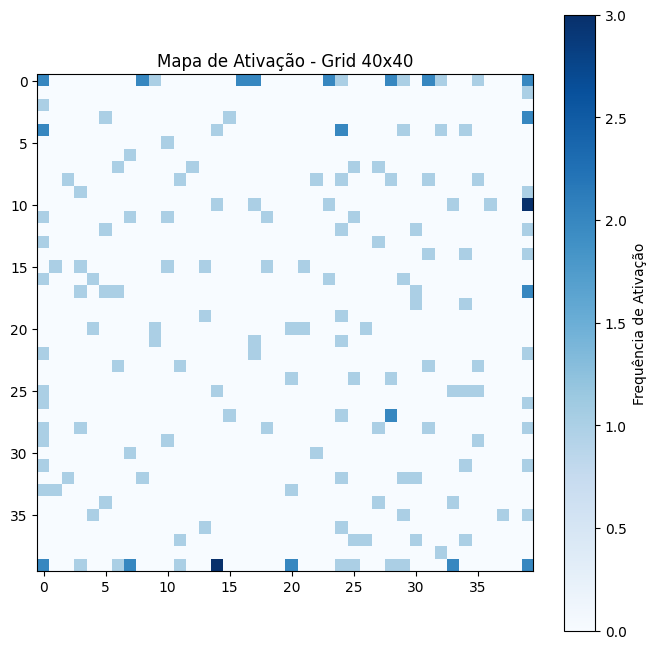

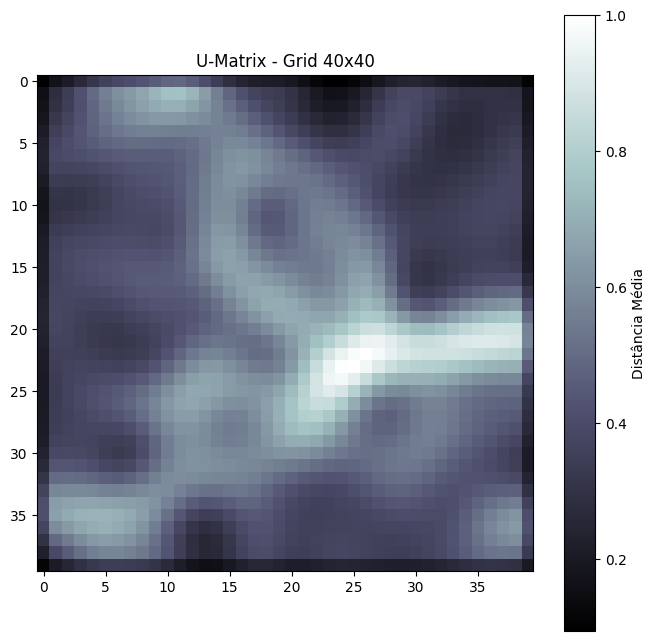

Treinando SOM com Grid 50x50 e sigma = 13.8593
Silhouette Score: 0.0766


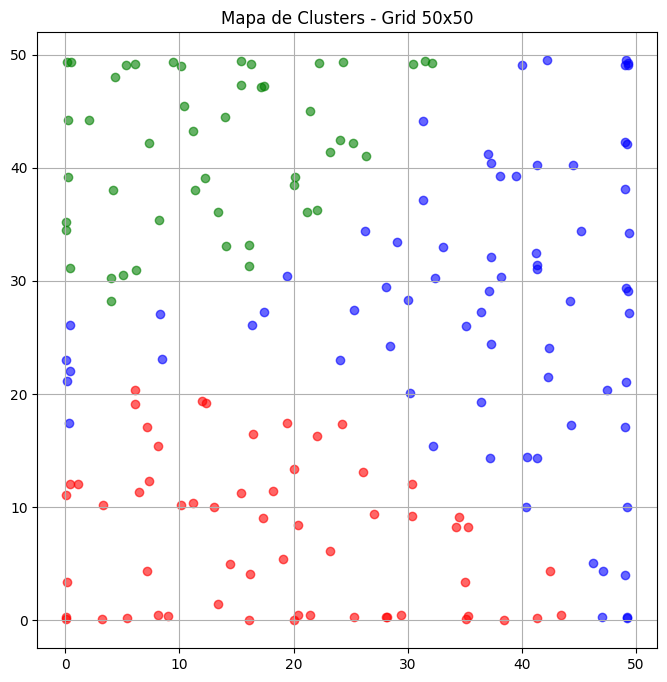

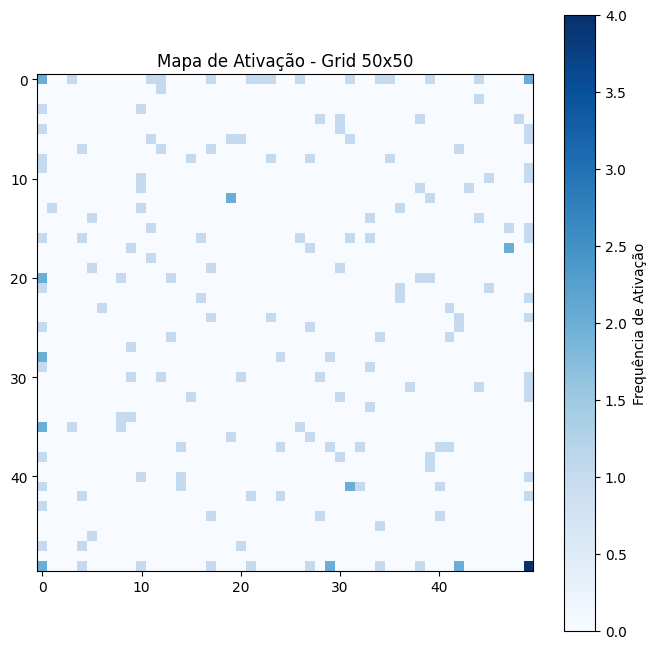

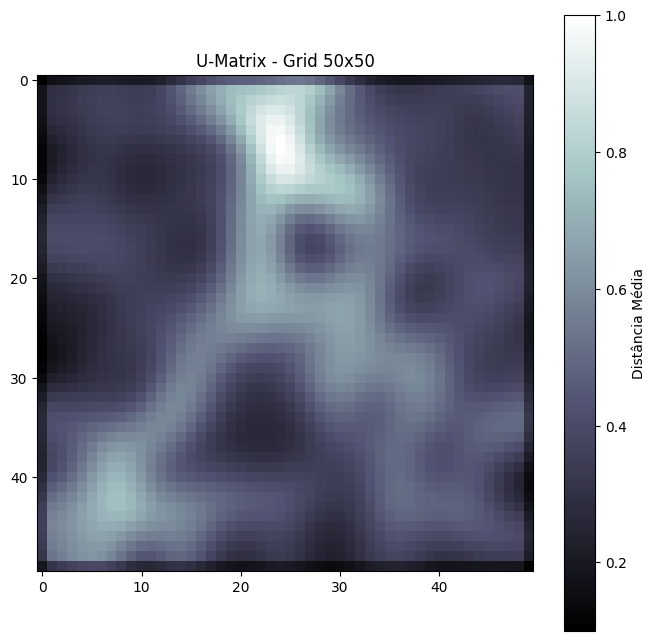

Treinando SOM com Grid 100x100 e sigma = 28.0014
Silhouette Score: 0.2541


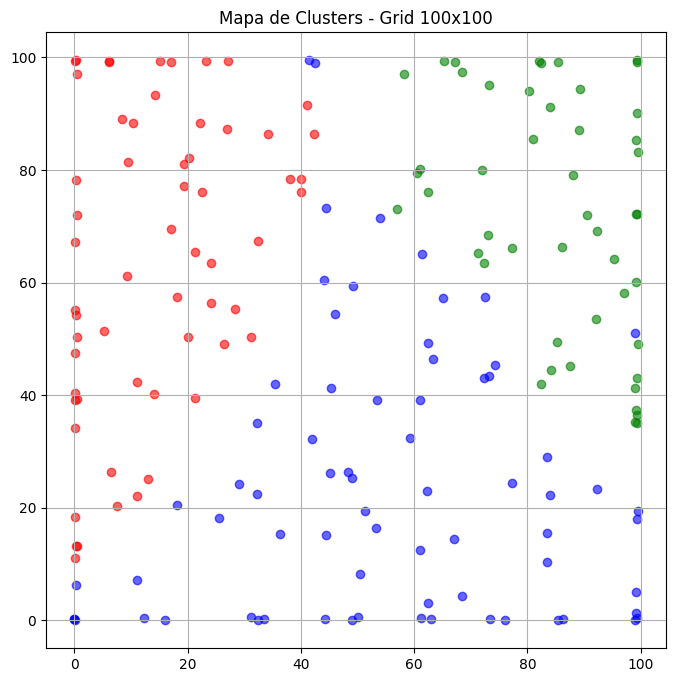

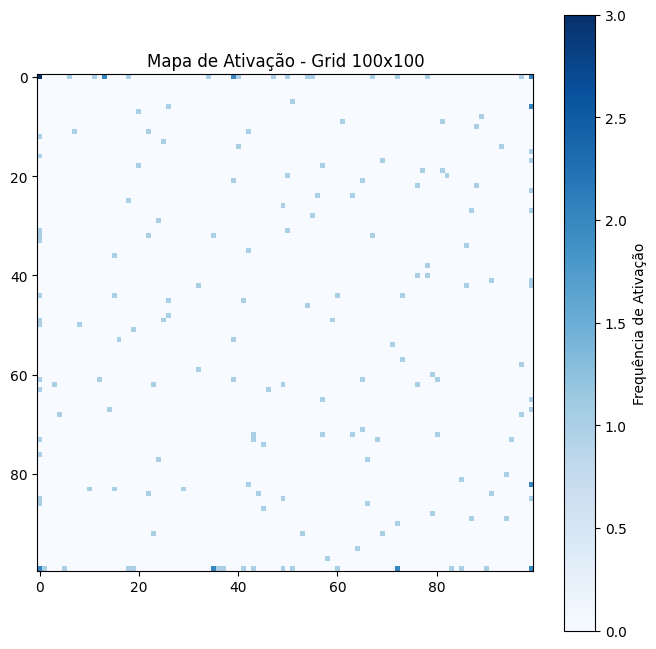

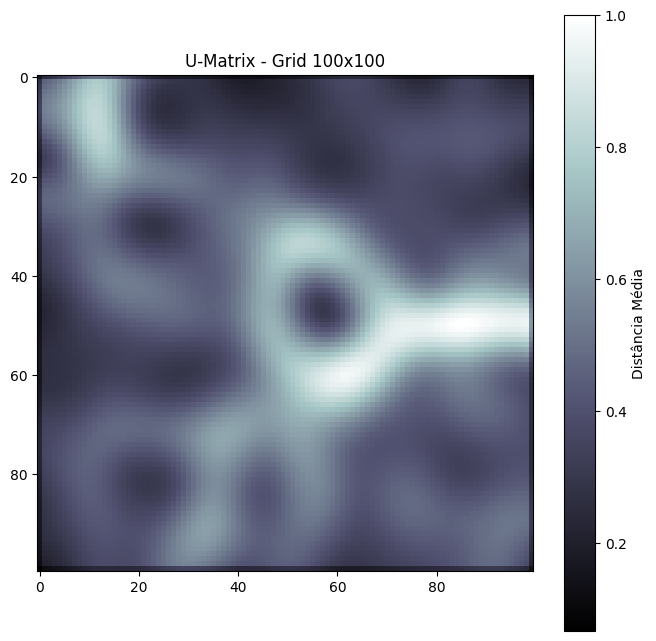

  Grid Size      Sigma  Silhouette Score
0     10x10   2.545584          0.270236
5   100x100  28.001429          0.254088
1     20x20   5.374012          0.251799
3     40x40  11.030866          0.167843
2     30x30   8.202439          0.093794
4     50x50  13.859293          0.076641


In [38]:
# 📦 Parâmetros fixos
iterations = 100000  # Número de iterações
learning_rate = 0.5  # Taxa de aprendizado

# 🔄 Diferentes tamanhos de grids
grid_sizes = [10, 20, 30, 40, 50, 100]

# Lista para armazenar os resultados
results = []

# 🎨 Funções de plot

def plot_som_with_colors(som, data, labels, grid_size):
    class_colors = ['red', 'blue', 'green']
    plt.figure(figsize=(8, 8))
    for i, sample in enumerate(data):
        bmu = som.winner(sample)
        plt.scatter(bmu[0] + np.random.rand() * 0.5, 
                    bmu[1] + np.random.rand() * 0.5,
                    color=class_colors[labels[i]], alpha=0.6)
    plt.title(f"Mapa de Clusters - Grid {grid_size}x{grid_size}")
    plt.grid(True)
    plt.show()

def plot_activation_map(som, data, grid_size):
    activation_map = np.zeros(som._weights.shape[:2])
    for sample in data:
        bmu = som.winner(sample)
        activation_map[bmu] += 1

    plt.figure(figsize=(8, 8))
    plt.imshow(activation_map, cmap='Blues')
    plt.colorbar(label='Frequência de Ativação')
    plt.title(f"Mapa de Ativação - Grid {grid_size}x{grid_size}")
    plt.grid(False)
    plt.show()

def plot_u_matrix(som, grid_size):
    u_matrix = som.distance_map()
    plt.figure(figsize=(8, 8))
    plt.imshow(u_matrix, cmap='bone')
    plt.colorbar(label='Distância Média')
    plt.title(f"U-Matrix - Grid {grid_size}x{grid_size}")
    plt.grid(False)
    plt.show()

# 🔄 Loop para testar diferentes tamanhos de grid
for size in grid_sizes:
    m, n = size, size  # Definindo o tamanho do grid

    # 📏 Calcular a distância máxima no grid
    d_max = np.sqrt((m - 1)**2 + (n - 1)**2)

    # 🔧 Definir sigma como 20% da distância máxima
    sigma = 0.2 * d_max

    print(f"Treinando SOM com Grid {m}x{n} e sigma = {sigma:.4f}")
    
    # Instanciar e treinar a SOM
    som = MiniSom(x=m, y=n, input_len=x_train_flat.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')
    som.random_weights_init(x_train_flat)
    som.train_random(data=x_train_flat, num_iteration=iterations)
    
    # Coletar BMUs
    bmu_indices = np.array([som.winner(sample) for sample in x_train_flat])
    bmu_flat = bmu_indices[:, 0] * som._weights.shape[1] + bmu_indices[:, 1]
    
    # Calcular o Silhouette Score
    score = silhouette_score(bmu_flat.reshape(-1, 1), y_train)
    print(f"Silhouette Score: {score:.4f}")
    
    # Armazenar resultados
    results.append({'Grid Size': f'{m}x{n}', 'Sigma': sigma, 'Silhouette Score': score})
    
    # Plotar gráficos para cada grid
    plot_som_with_colors(som, x_train_flat, y_train, size)
    plot_activation_map(som, x_train_flat, size)
    plot_u_matrix(som, size)

# 📊 Tabela de comparação dos Silhouette Scores
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
print(results_df)

## 📝 Análise Crítica

### **1. Impacto do Tamanho do Grid no Agrupamento**

- **Grid 10x10:** Apresentou o **maior Silhouette Score (0.2702)**, indicando uma boa formação de clusters. A menor granularidade favorece a organização dos dados, reduzindo a complexidade do mapeamento.

- **Grid 20x20:** O desempenho caiu levemente para **0.2518**, ainda assim mantendo uma boa separação dos clusters. A matriz de ativação mostra uma dispersão razoável, mas a granularidade já começa a impactar a qualidade.

- **Grid 30x30 e 50x50:** Os resultados **pioraram significativamente**. O Silhouette Score caiu para **0.0938** e **0.0766**, respectivamente. A ativação tornou-se mais esparsa, sugerindo sobreajuste ou dificuldade na formação de clusters coesos.

- **Grid 100x100:** Curiosamente, houve uma **recuperação do Silhouette Score para 0.2541**. A elevada granularidade possibilitou uma melhor adaptação aos dados, mas a matriz de ativação mostra uma dispersão excessiva, o que pode indicar **overfitting**.

---

### **2. Efeito do Sigma**

- O sigma foi ajustado para representar **20% da propagação** do grid, o que resultou em diferentes valores de dispersão conforme o tamanho do grid aumentou.

- Em grids menores (10x10, 20x20), o sigma controlou bem a vizinhança, resultando em clusters mais coesos.

- Em grids maiores (30x30 até 100x100), o sigma cresceu proporcionalmente, aumentando a influência da vizinhança, o que pode ter **suavizado demais as fronteiras entre clusters**, prejudicando a separação clara.

---

### **3. Análise dos Mapas**

- **Mapa de Clusters:**  
  Nos grids menores, os clusters são mais compactos e organizados. Nos grids maiores, há uma dispersão excessiva, tornando a separação entre grupos menos evidente.

- **Mapa de Ativação:**  
  A ativação é **mais densa em grids menores** e **mais dispersa em grids maiores**. Em grids como 50x50 e 100x100, há **várias áreas pouco ou nada ativadas**, indicando subutilização dos neurônios.

- **U-Matrix:**  
  A U-Matrix revela uma transição suave entre clusters em grids pequenos, mas em grids grandes as fronteiras se tornam menos definidas, evidenciando dificuldades na distinção dos clusters.

---

## 🎯 Conclusões

1. **Melhor desempenho com grids pequenos:** O grid **10x10** apresentou o melhor balanceamento entre granularidade e formação de clusters.  
2. **Grids maiores sofrem com dispersão:** Conforme o grid aumenta, o modelo perde coesão e a qualidade dos clusters diminui.  
3. **Sigma proporcional precisa ser ajustado:** O sigma proporcional ao tamanho do grid se mostrou ineficaz para grids maiores, sugerindo a necessidade de um **controle mais rigoroso**.  
4. **Overfitting em grids grandes:** O aumento do sigma com grids grandes pode estar contribuindo para **overfitting**, criando clusters muito adaptados aos dados de treino.

---

---

In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# 📥 Carregar o Dataset Iris
iris = load_iris()
x_train = iris.data  # Dados (features)
y_train = iris.target  # Classes (rótulos)

# 🔄 Pré-processamento: Normalizar as características para [0, 1]
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)

In [19]:
from minisom import MiniSom
import matplotlib.pyplot as plt

# 📦 Parâmetros do grid
m, n = 10, 10  # Tamanho do grid
iterations = 70000  # Número total de iterações

# 📏 Calcular a distância máxima no grid
d_max = np.sqrt((m - 1)**2 + (n - 1)**2)  # Distância máxima no grid

# 🔧 Definir sigma para alcançar 10% da distância máxima
sigma = 0.1 * d_max  # Raio de vizinhança inicial de 10% do grid
learning_rate = 0.5  # Taxa de aprendizado

# 🔄 Instanciando a SOM com MiniSom
som = MiniSom(x=m, y=n, input_len=x_train_normalized.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')

# Inicializar pesos aleatoriamente
som.random_weights_init(x_train_normalized)

# 🚀 Treinar a SOM
som.train_random(data=x_train_normalized, num_iteration=iterations)


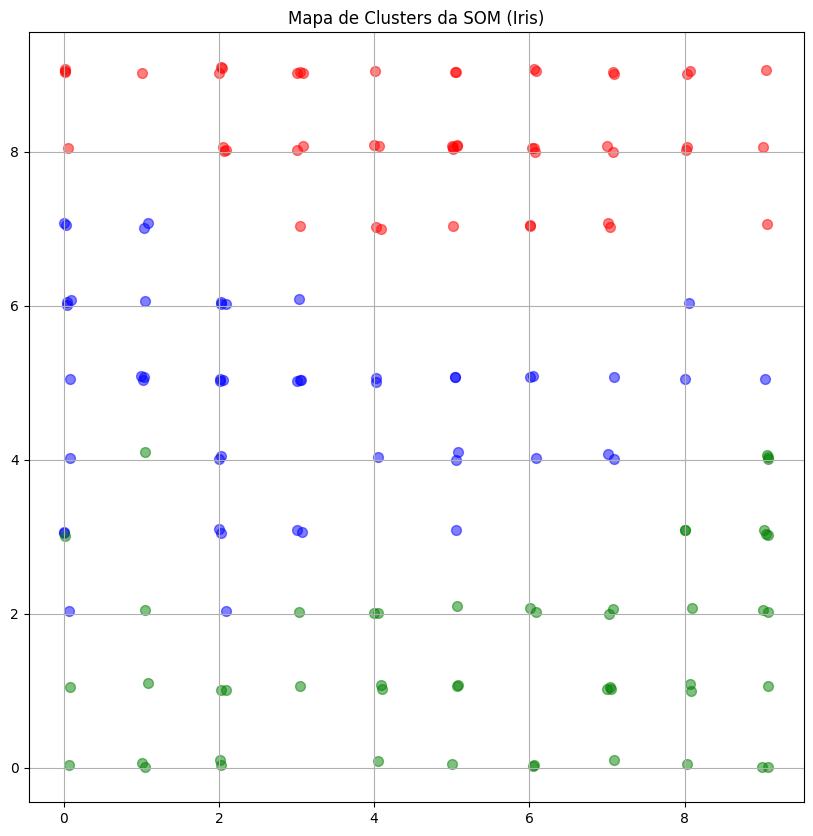

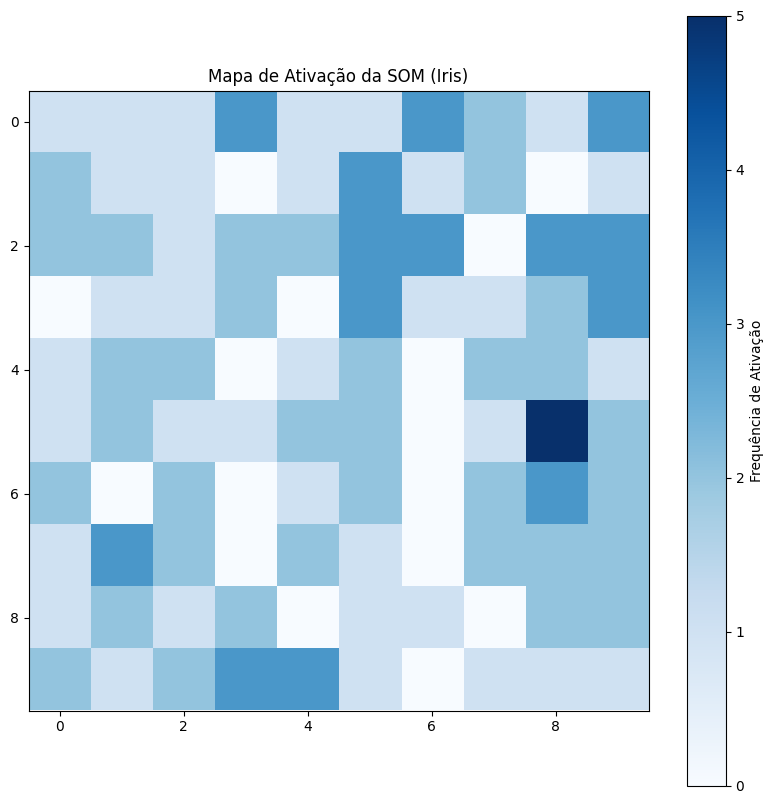

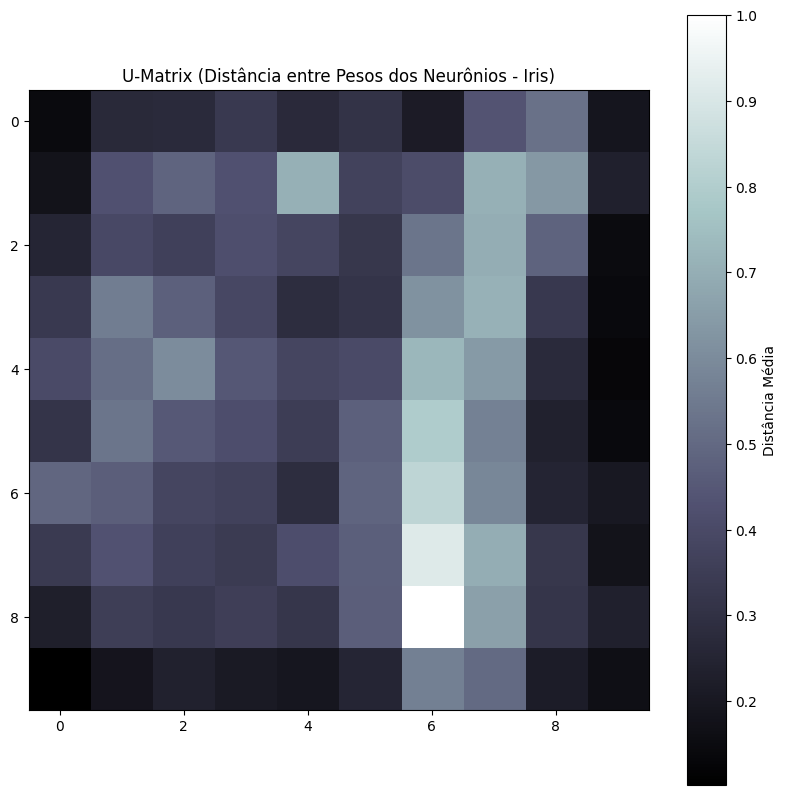

Silhouette Score: -0.0339


In [20]:
# 🎨 Função para plotar o mapa de clusters com cores para as 3 classes do Iris
def plot_som_with_colors(som, data, labels, sample_size=150):  # 150 amostras no Iris
    class_colors = ['red', 'blue', 'green']  # 3 classes do Iris
    plt.figure(figsize=(10, 10))

    # Garantir que a amostra não exceda o total de pontos
    sample_size = min(sample_size, len(data))
    indices = np.random.choice(len(data), sample_size, replace=False)

    bmus = [som.winner(data[i]) for i in indices]
    for idx, (x, y) in enumerate(bmus):
        plt.scatter(x + np.random.rand() * 0.1,
                    y + np.random.rand() * 0.1,
                    color=class_colors[labels[indices[idx]]],
                    alpha=0.5, s=50)

    plt.title("Mapa de Clusters da SOM (Iris)")
    plt.grid(True)
    plt.show()

# Plot do Mapa de Clusters
plot_som_with_colors(som, x_train_normalized, y_train)


# 🎨 Função para plotar o mapa de ativação
def plot_activation_map(som, data):
    activation_map = np.zeros(som._weights.shape[:2])

    for sample in data:
        bmu = som.winner(sample)
        activation_map[bmu] += 1

    plt.figure(figsize=(10, 10))
    plt.imshow(activation_map, cmap='Blues')
    plt.colorbar(label='Frequência de Ativação')
    plt.title("Mapa de Ativação da SOM (Iris)")
    plt.grid(False)
    plt.show()

# Plot do Mapa de Ativação
plot_activation_map(som, x_train_normalized)


# 🎨 Função para plotar a U-Matrix
def plot_u_matrix(som):
    u_matrix = som.distance_map()

    plt.figure(figsize=(10, 10))
    plt.imshow(u_matrix, cmap='bone')
    plt.colorbar(label='Distância Média')
    plt.title("U-Matrix (Distância entre Pesos dos Neurônios - Iris)")
    plt.grid(False)
    plt.show()

# Plot da U-Matrix
plot_u_matrix(som)


# 📊 Avaliação com Silhouette Score
# Coletar os BMUs
bmu_indices = np.array([som.winner(sample) for sample in x_train_normalized])
bmu_flat = bmu_indices[:, 0] * som._weights.shape[1] + bmu_indices[:, 1]

# Calcular o Silhouette Score
score = silhouette_score(bmu_flat.reshape(-1, 1), y_train)
print(f"Silhouette Score: {score:.4f}")

## 1. Mapa de Clusters da SOM (Figura 1)

O primeiro gráfico exibe o **Mapa de Clusters da SOM**, com as três classes do dataset Iris representadas por cores distintas (`red` para a classe 0, `blue` para a classe 1 e `green` para a classe 2).

### Análise:
- O mapa mostra uma boa separação espacial entre as classes, com áreas dominadas por cada cor. Por exemplo:
  - A classe 0 (vermelha) está concentrada majoritariamente na parte superior do grid.
  - A classe 1 (azul) está mais dispersa, mas ainda separada da classe 0.
  - A classe 2 (verde) está concentrada na parte inferior do grid.
- A sobreposição entre as classes parece mínima, indicando que o SOM conseguiu capturar a estrutura dos dados de forma satisfatória.
- A dispersão dentro de cada classe é visualmente consistente com a variação esperada do dataset Iris, refletindo as diferenças entre as medidas das flores.

### Crítica:
- Apesar da separação aparente, a dispersão dentro das classes (principalmente a classe 1) pode indicar variabilidade ou potencial ruído nos dados.
- A análise poderia ser complementada com métricas quantitativas para validar a qualidade da separação.

---

## 2. Mapa de Ativação da SOM (Figura 2)

O segundo gráfico mostra o **Mapa de Ativação**, que reflete a frequência com que os neurônios no grid SOM foram ativados pelos dados.

### Análise:
- Há regiões no grid com alta ativação (pontos mais escuros), indicando que determinados neurônios foram frequentemente ativados para representar os dados.
- As áreas com ativação moderada sugerem que os dados foram bem distribuídos pelo grid, evitando concentrações excessivas.
- A presença de células pouco ativadas (pontos claros) sugere que alguns neurônios não foram significativamente utilizados. Isso pode ser devido à redundância no grid ou à necessidade de mais iterações de treinamento.

### Crítica:
- Idealmente, o mapa de ativação deve ser homogêneo para garantir que o grid SOM foi utilizado de forma eficiente. A presença de células com ativação nula ou muito baixa pode indicar um ajuste insuficiente dos parâmetros, como o raio de vizinhança ou o número de iterações.

---

## 3. U-Matrix (Figura 3)

A **U-Matrix** representa a distância média entre os pesos dos neurônios vizinhos no grid, indicando as regiões de maior variação nos dados.

### Análise:
- As áreas claras correspondem a regiões de alta variação entre os pesos dos neurônios, que geralmente representam as fronteiras entre clusters.
- As áreas escuras refletem menor variação e indicam grupos homogêneos de dados.
- A separação das classes é visível na matriz, com regiões distintas que sugerem a formação de clusters bem definidos.

### Crítica:
- A matriz confirma a separação entre as classes observada no Mapa de Clusters, mas também revela que algumas fronteiras entre clusters não são tão bem definidas (regiões de transição suaves).
- Isso pode ser resultado da natureza dos dados do Iris, que possuem alguma sobreposição entre as classes, especialmente entre as classes 1 e 2.

---

## 4. Silhouette Score

O **Silhouette Score** obtido foi **-0.0339**, indicando uma ligeira sobreposição ou dificuldade na separação dos clusters.

### Análise:
- Um Silhouette Score negativo sugere que alguns pontos podem estar mais próximos de clusters que não correspondem ao seu rótulo verdadeiro.
- Este resultado é consistente com a sobreposição visualmente identificada no Mapa de Clusters e na U-Matrix, especialmente entre as classes 1 e 2.

### Crítica:
- A baixa separação observada pode ser atribuída à simplicidade dos dados do Iris, que possuem apenas 4 dimensões e incluem classes com interseção natural nos valores das features.
- Para melhorar o Silhouette Score, seria interessante explorar técnicas como ajuste do grid SOM, aumento do número de iterações ou pré-processamento avançado (como redução de dimensionalidade ou engenharia de features).

---

## Conclusões Finais

- O SOM conseguiu capturar a estrutura geral do dataset Iris, separando as classes de forma visualmente satisfatória no grid.
- O Mapa de Ativação e a U-Matrix confirmam que os clusters são bem representados, embora existam áreas de transição entre classes, principalmente entre as classes 1 e 2.
- O Silhouette Score negativo destaca que, apesar da separação visual, ainda há dificuldade em discriminar completamente as classes, refletindo a interseção inerente aos dados do Iris.


Treinando SOM com sigma = 1.2728 (10% de propagação)
Silhouette Score: 0.0146


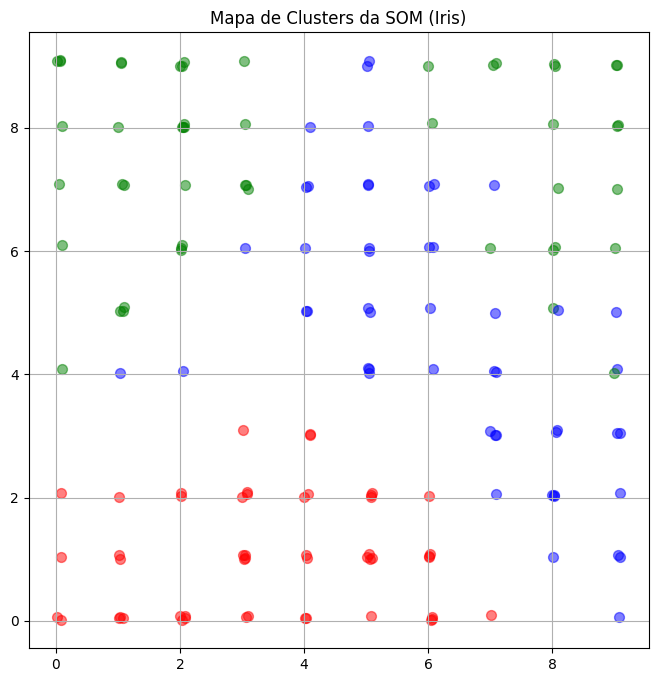

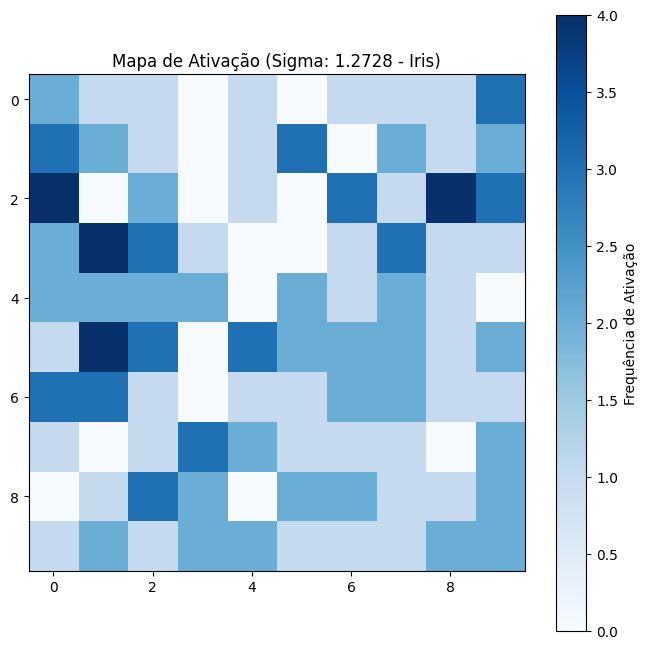

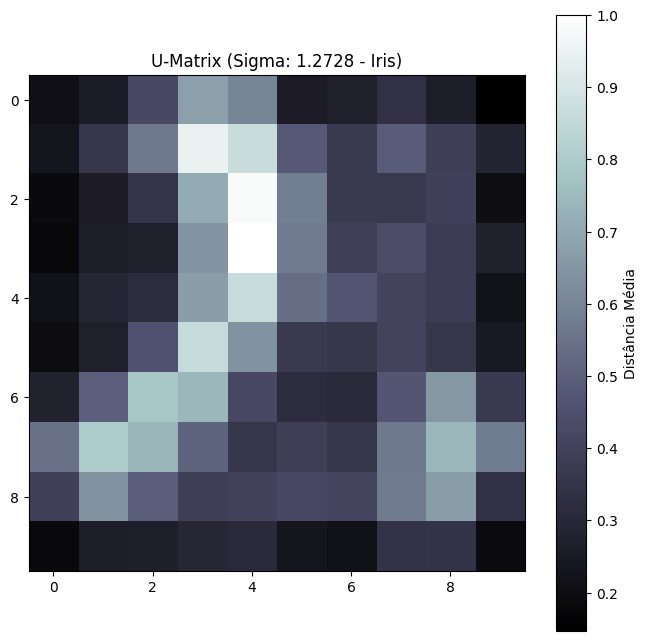

Treinando SOM com sigma = 2.5456 (20% de propagação)
Silhouette Score: -0.0436


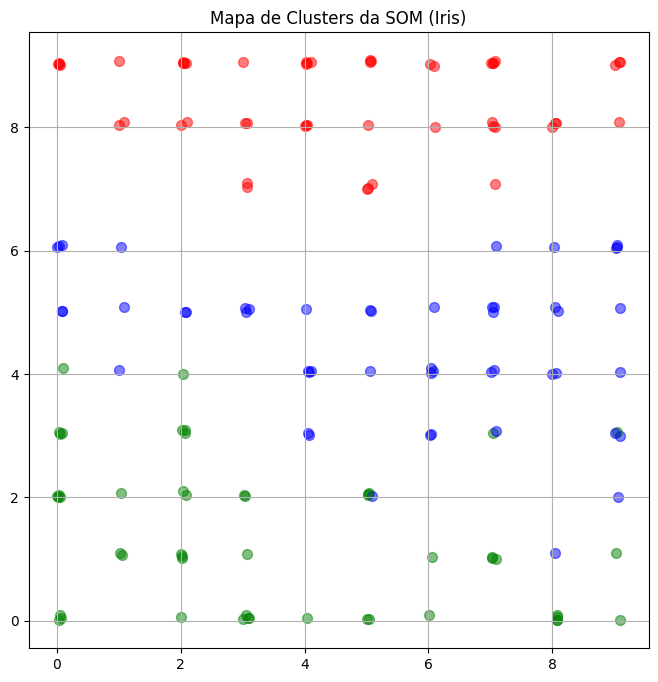

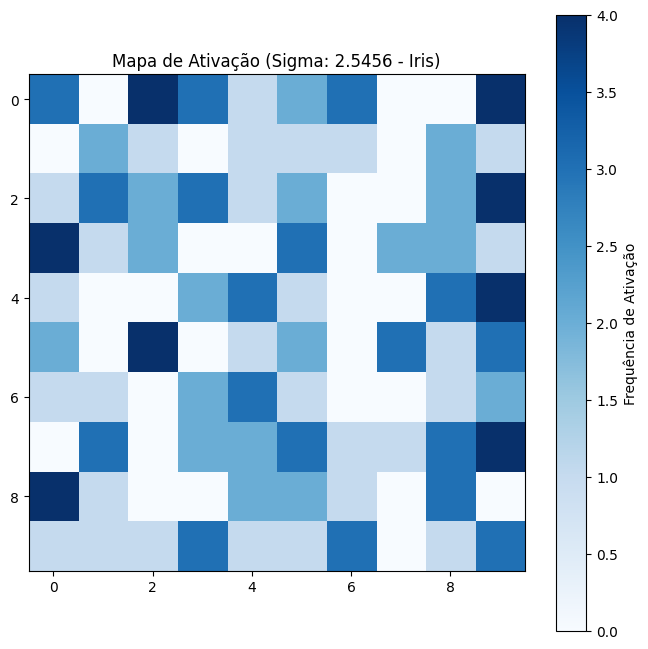

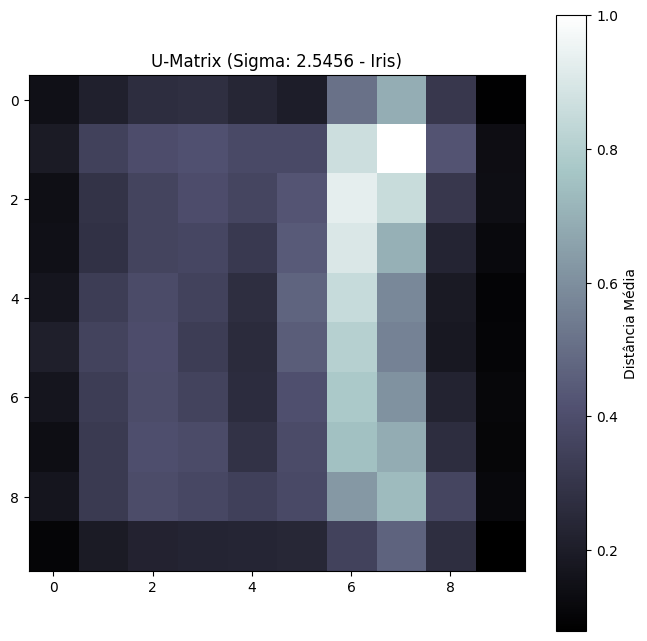

Treinando SOM com sigma = 3.8184 (30% de propagação)
Silhouette Score: -0.0487


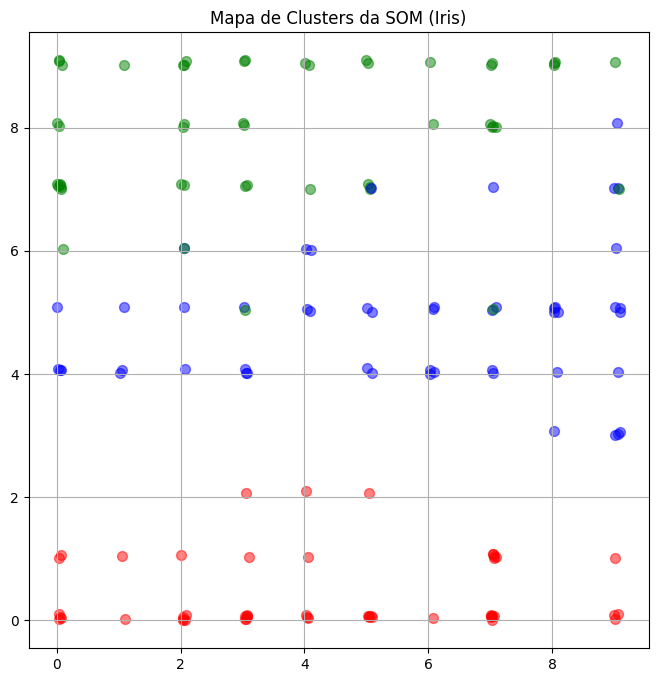

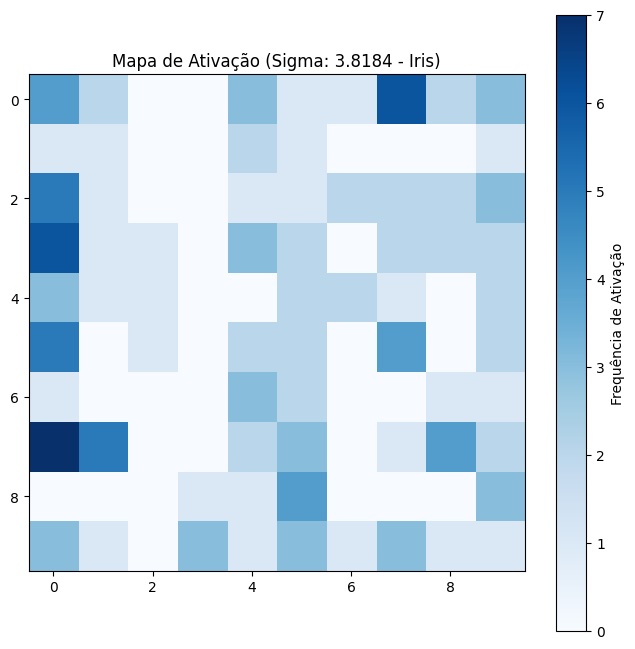

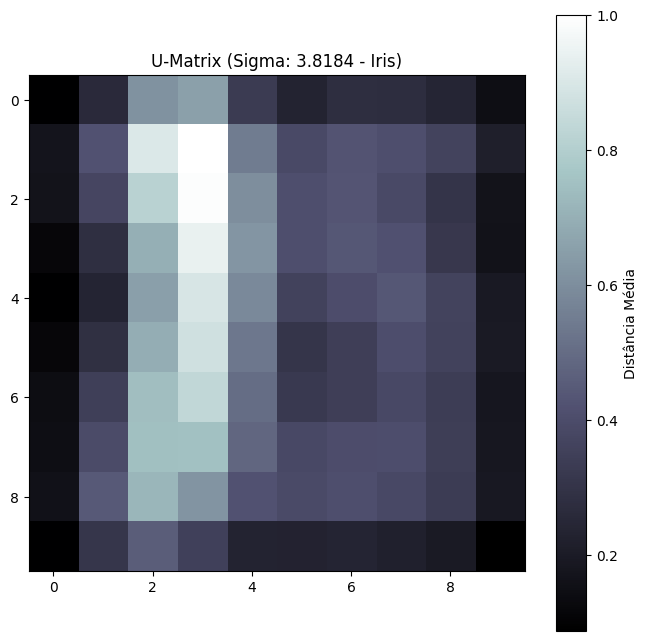

Treinando SOM com sigma = 5.0912 (40% de propagação)
Silhouette Score: -0.0544


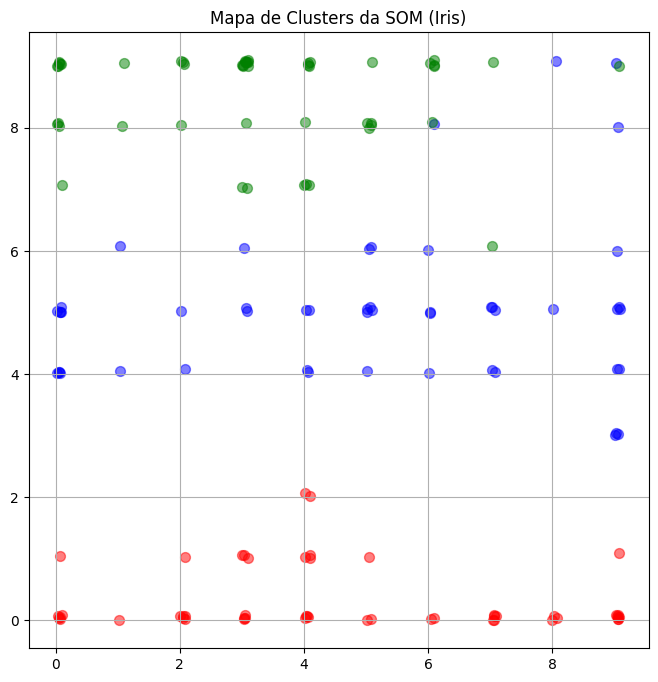

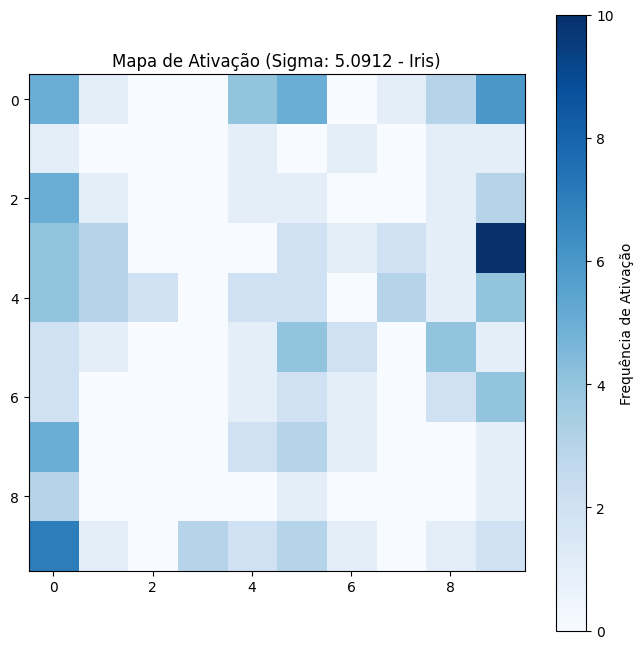

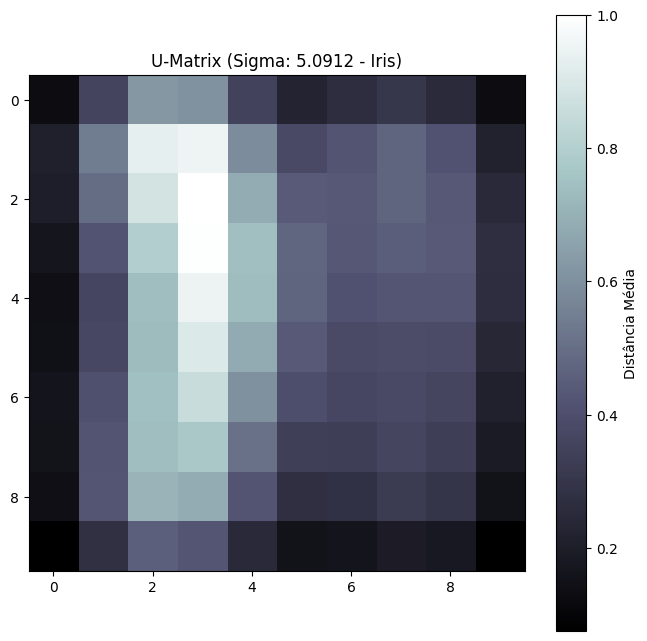

Treinando SOM com sigma = 6.3640 (50% de propagação)
Silhouette Score: -0.0422


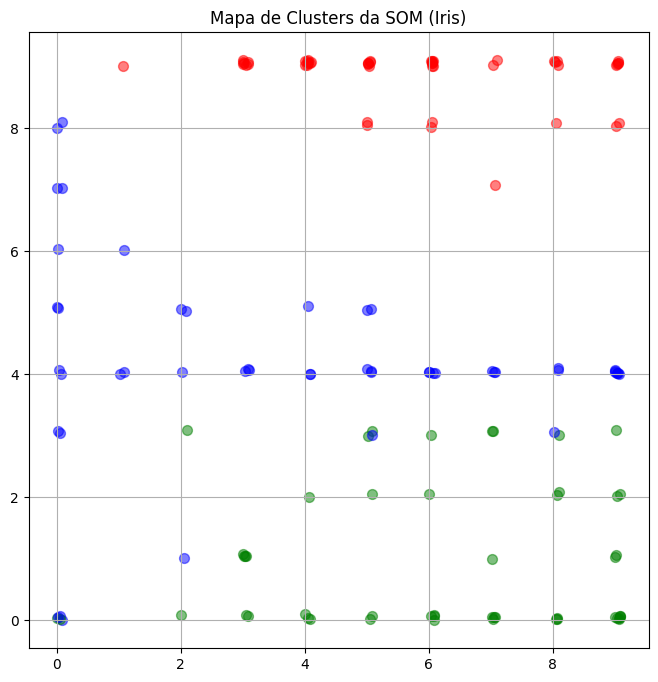

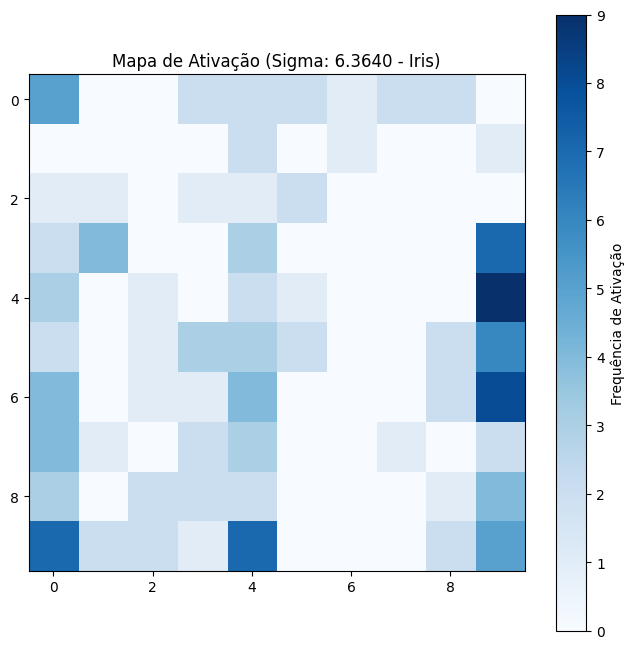

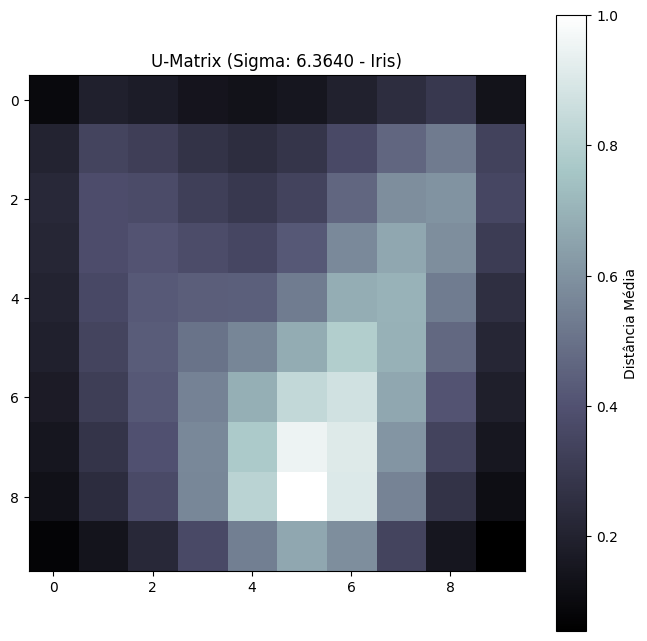

Treinando SOM com sigma = 12.7279 (100% de propagação)
Silhouette Score: 0.4102


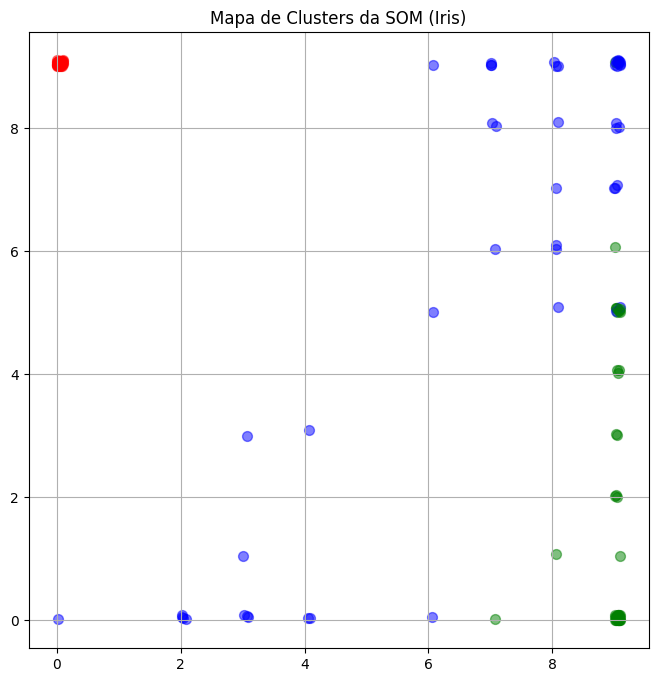

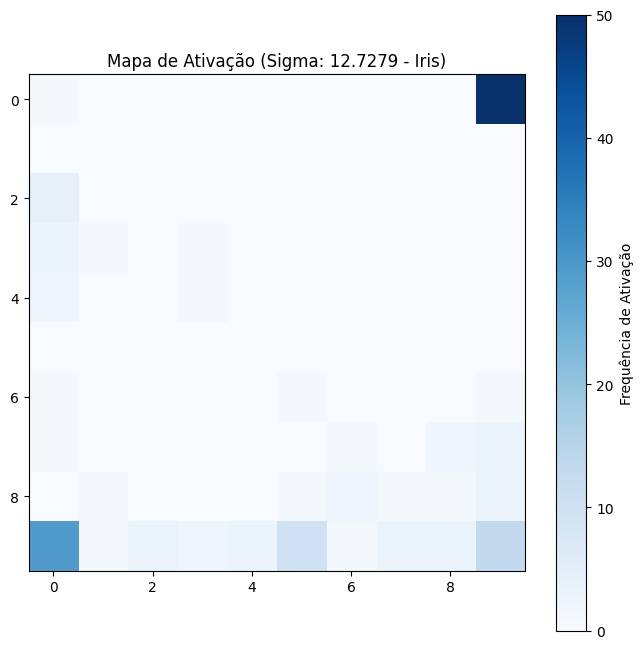

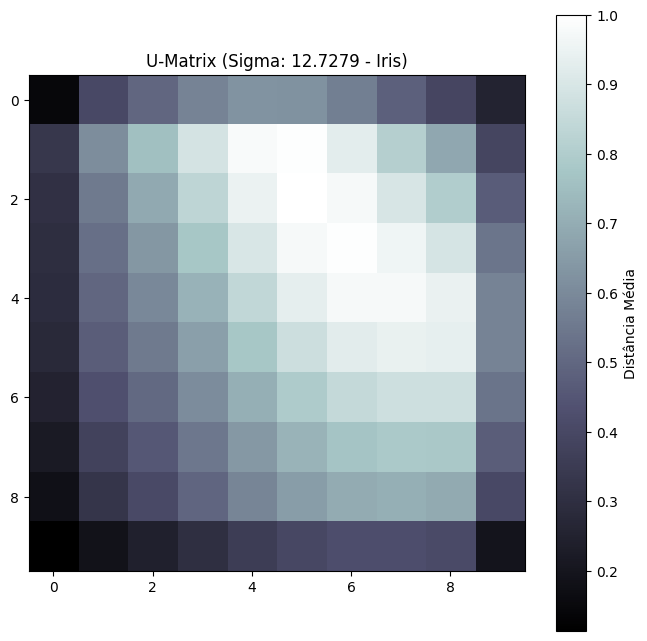

       Sigma  Propagação (%)  Silhouette Score
5  12.727922             100          0.410246
0   1.272792              10          0.014640
4   6.363961              50         -0.042201
1   2.545584              20         -0.043624
2   3.818377              30         -0.048697
3   5.091169              40         -0.054394


In [23]:
# 📦 Parâmetros fixos
m, n = 10, 10  
iterations = 10000 
learning_rate = 0.5 

# 📏 Calcular a distância máxima no grid
d_max = np.sqrt((m - 1)**2 + (n - 1)**2)

# 🔧 Proporções de propagação para calcular sigma
propagation_values = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

# Lista para armazenar os resultados
results = []

# 🎨 Funções de plot ajustadas
def plot_som_with_colors(som, data, labels, sample_size=150):  
    class_colors = ['red', 'blue', 'green']  
    plt.figure(figsize=(8, 8))
    indices = np.random.choice(len(data), sample_size, replace=False)

    bmus = [som.winner(data[i]) for i in indices]
    for idx, (x, y) in enumerate(bmus):
        plt.scatter(x + np.random.rand() * 0.1,
                    y + np.random.rand() * 0.1,
                    color=class_colors[labels[indices[idx]]], alpha=0.5, s=50)

    plt.title("Mapa de Clusters da SOM (Iris)")
    plt.grid(True)
    plt.show()

def plot_activation_map(som, data, sigma):
    activation_map = np.zeros(som._weights.shape[:2])
    for sample in data:
        bmu = som.winner(sample)
        activation_map[bmu] += 1

    plt.figure(figsize=(8, 8))
    plt.imshow(activation_map, cmap='Blues')
    plt.colorbar(label='Frequência de Ativação')
    plt.title(f"Mapa de Ativação (Sigma: {sigma:.4f} - Iris)")
    plt.grid(False)
    plt.show()

def plot_u_matrix(som, sigma):
    u_matrix = som.distance_map()
    plt.figure(figsize=(8, 8))
    plt.imshow(u_matrix, cmap='bone')
    plt.colorbar(label='Distância Média')
    plt.title(f"U-Matrix (Sigma: {sigma:.4f} - Iris)")
    plt.grid(False)
    plt.show()

# 🔄 Loop para testar diferentes valores de propagação
for prop in propagation_values:
    sigma = prop * d_max  # Calculando sigma com base em d_max
    print(f"Treinando SOM com sigma = {sigma:.4f} ({int(prop * 100)}% de propagação)")

    # Instanciar e treinar a SOM
    som = MiniSom(x=m, y=n, input_len=x_train_normalized.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')
    som.random_weights_init(x_train_normalized)
    som.train_random(data=x_train_normalized, num_iteration=iterations)

    # Coletar BMUs
    bmu_indices = np.array([som.winner(sample) for sample in x_train_normalized])
    bmu_flat = bmu_indices[:, 0] * som._weights.shape[1] + bmu_indices[:, 1]

    # Calcular o Silhouette Score
    score = silhouette_score(bmu_flat.reshape(-1, 1), y_train)
    print(f"Silhouette Score: {score:.4f}")

    # Armazenar resultados
    results.append({'Sigma': sigma, 'Propagação (%)': int(prop * 100), 'Silhouette Score': score})

    # Plotar gráficos para cada sigma
    plot_som_with_colors(som, x_train_normalized, y_train, sample_size=150)
    plot_activation_map(som, x_train_normalized, sigma)
    plot_u_matrix(som, sigma)

# 📊 Tabela de comparação dos Silhouette Scores
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
print(results_df)

## Análise por Propagação

### **Sigma = 10% (1.2728)**
- **Mapa de Clusters**: 
  - Boa separação das classes, com a classe verde (setosa) isolada na parte inferior.
  - No entanto, as classes azul e vermelha apresentam sobreposição significativa.
- **Mapa de Ativação**:
  - Algumas células são frequentemente ativadas, mas há áreas do grid com pouca ou nenhuma ativação.
- **U-Matrix**:
  - As fronteiras entre clusters não estão bem definidas, sugerindo que o `sigma` é muito baixo para capturar a estrutura global dos dados.
- **Silhouette Score**: **0.0146**
  - Indica uma separação fraca entre os clusters.

---

### **Sigma = 20% (2.5456)**
- **Mapa de Clusters**:
  - As classes começam a se espalhar pelo grid, mas a sobreposição entre azul e vermelho ainda persiste.
- **Mapa de Ativação**:
  - Mais neurônios começam a ser ativados, mas ainda há áreas com baixa ativação.
- **U-Matrix**:
  - Fronteiras mais claras começam a surgir, mas ainda não bem definidas.
- **Silhouette Score**: **-0.0436**
  - Valor negativo indica que pontos estão mais próximos de clusters incorretos do que de seus próprios clusters.

---

### **Sigma = 30% (3.8184)**
- **Mapa de Clusters**:
  - As classes continuam a se espalhar, mas a sobreposição ainda é visível, especialmente entre azul e verde.
- **Mapa de Ativação**:
  - Distribuição mais equilibrada das ativações, mas algumas áreas continuam com ativação nula.
- **U-Matrix**:
  - Fronteiras começam a se formar, mas a separação não é clara o suficiente.
- **Silhouette Score**: **-0.0487**
  - Confirma a dificuldade em separar claramente as classes.

---

### **Sigma = 40% (5.0912)**
- **Mapa de Clusters**:
  - As classes começam a perder definição conforme `sigma` aumenta, com maior dispersão no grid.
- **Mapa de Ativação**:
  - Frequência de ativação mais equilibrada, mas algumas células continuam subutilizadas.
- **U-Matrix**:
  - A distância média entre os pesos diminui, sugerindo que os clusters estão se misturando.
- **Silhouette Score**: **-0.0544**
  - O maior valor negativo observado, indicando maior confusão entre os clusters.

---

### **Sigma = 50% (6.3640)**
- **Mapa de Clusters**:
  - As classes perdem ainda mais definição, com várias sobreposições.
- **Mapa de Ativação**:
  - Frequência de ativação mais homogênea, mas algumas áreas ainda têm ativação nula.
- **U-Matrix**:
  - As fronteiras entre clusters começam a desaparecer.
- **Silhouette Score**: **-0.0422**
  - Pequena melhora, mas ainda negativo.

---

### **Sigma = 100% (12.7279)**
- **Mapa de Clusters**:
  - As classes são mais uniformemente distribuídas no grid, mas a separação visual é fraca.
  - A classe azul domina a maior parte do grid.
- **Mapa de Ativação**:
  - Quase todos os neurônios são ativados, mas muitos com frequências muito altas, indicando que o SOM está colapsando em clusters muito amplos.
- **U-Matrix**:
  - A matriz se torna mais homogênea, indicando que os clusters estão se misturando.
- **Silhouette Score**: **0.4102**
  - O melhor valor observado, mas o comportamento não reflete separação clara entre as classes.

---

## Conclusões
1. **Melhor Sigma**:
   - O melhor valor de **Silhouette Score** foi observado em `sigma = 100%`. Contudo, o mapa resultante sugere que as classes perderam definição visual, com muitos neurônios representando múltiplas classes.
   - Um valor intermediário de `sigma` (10-30%) poderia balancear melhor a separação visual e a ativação.

2. **Problemas com Grid 10x10**:
   - O grid 10x10 pode ser excessivamente grande para o dataset Iris, levando à subutilização de células.
   - Um grid menor (e.g., 6x6 ou 8x8) poderia melhorar a eficiência e a representação dos clusters.

3. **Silhouette Score**:
   - O Silhouette Score mostrou inconsistências com os mapas visuais. Embora `sigma = 100%` tenha o melhor valor, a separação visual das classes não reflete a qualidade esperada.

---

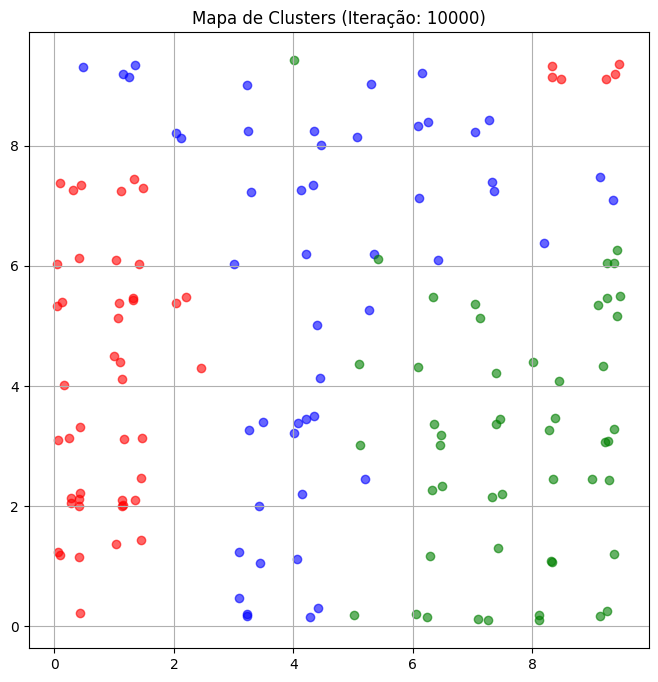

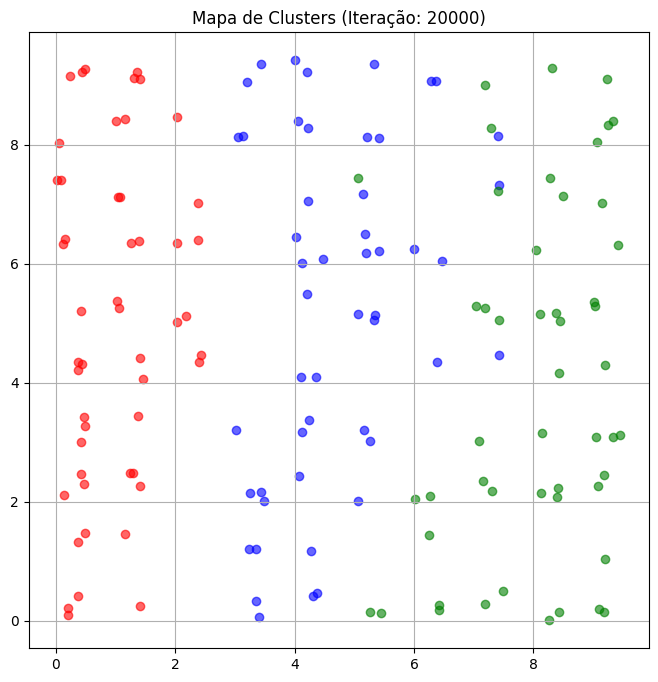

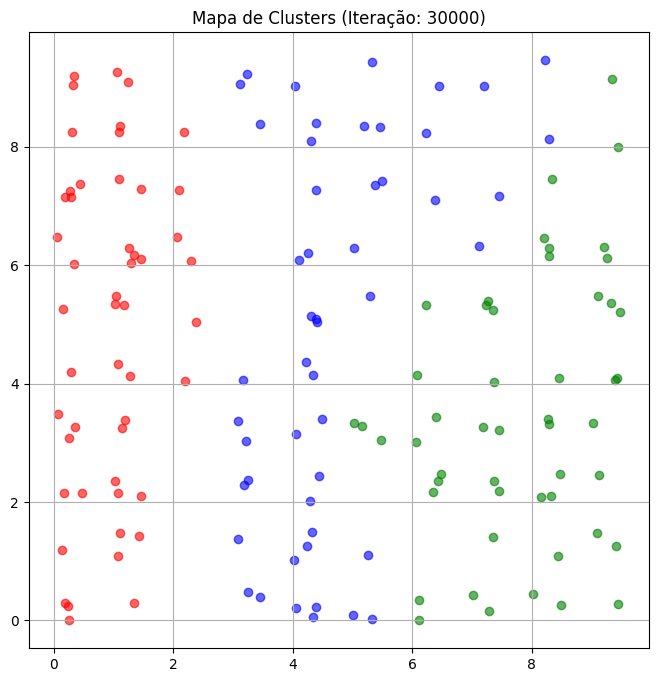

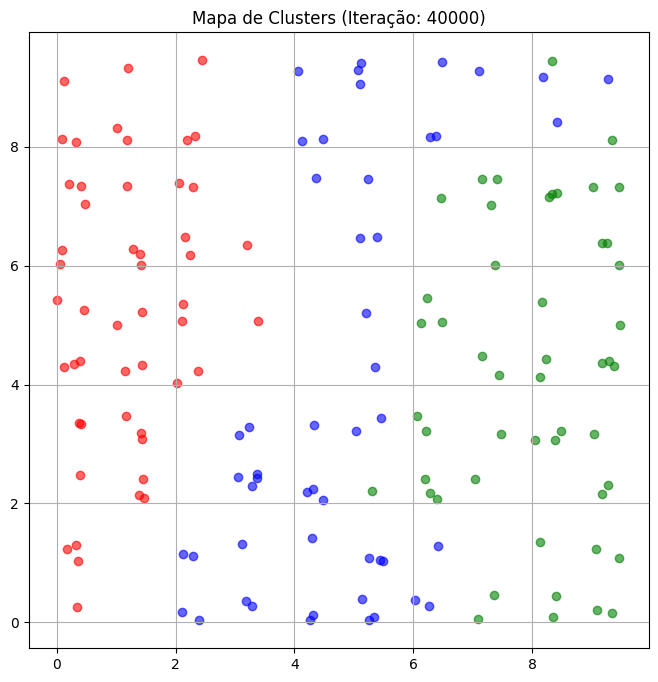

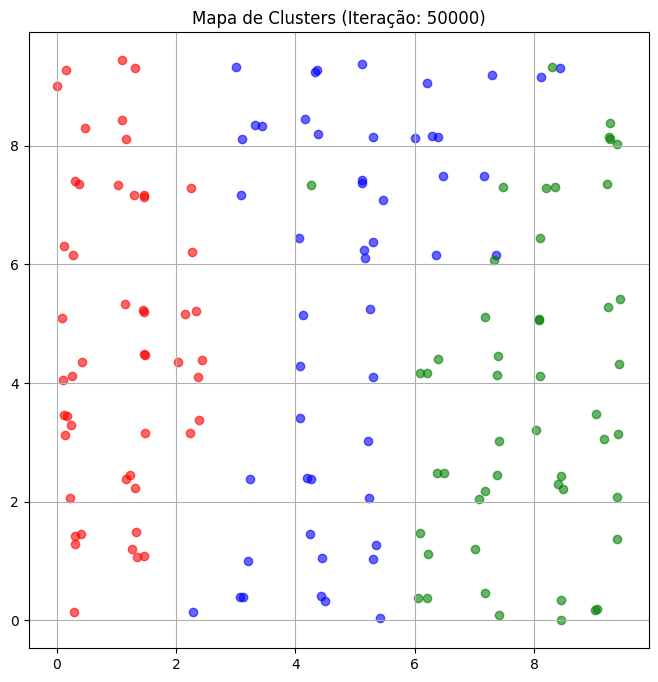

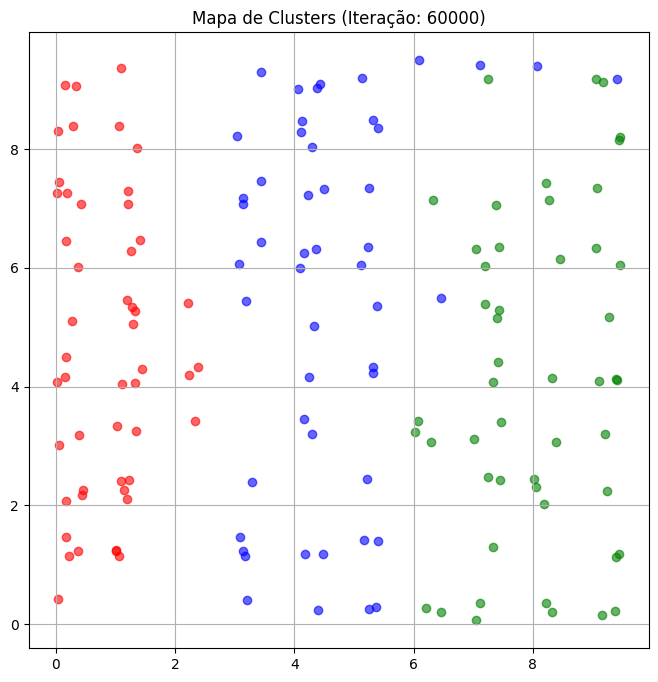

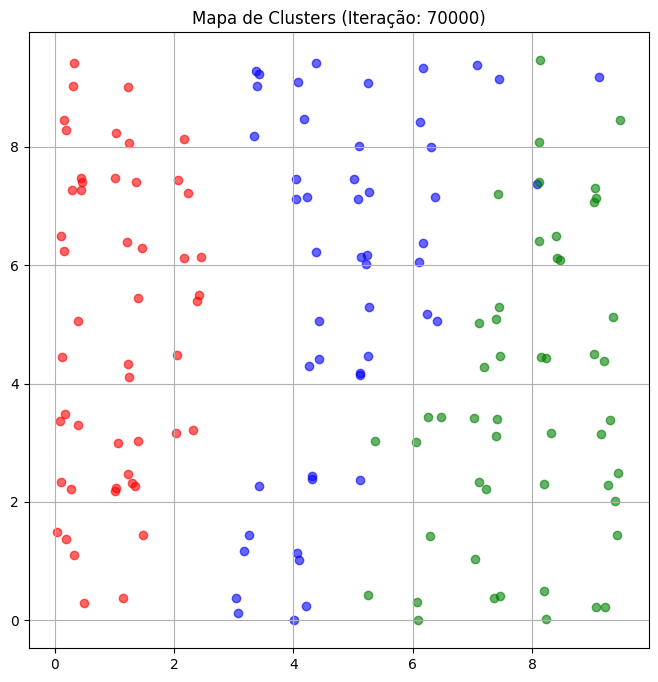

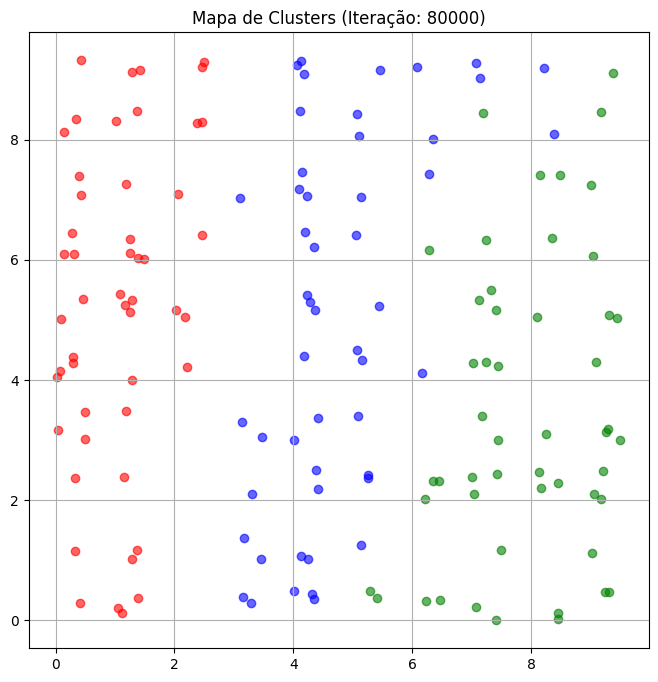

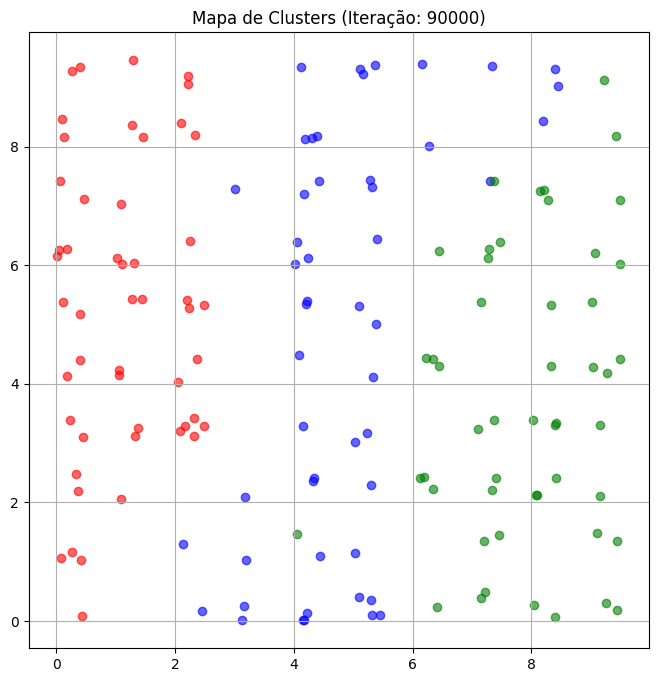

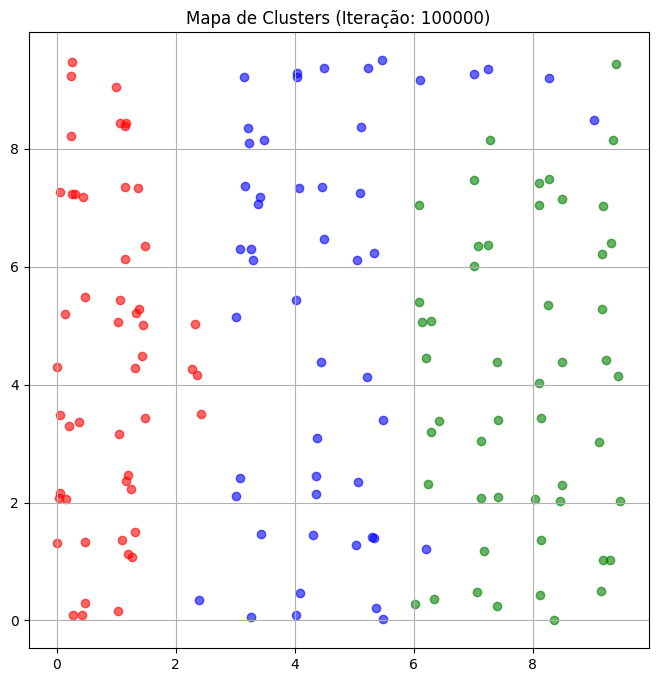

In [26]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# 📥 Carregar o Dataset Iris
iris = load_iris()
x_train = iris.data  # Dados (features)
y_train = iris.target  # Classes (rótulos)

# 🔄 Pré-processamento: normalizar os dados para [0, 1]
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)

# 📦 Parâmetros da SOM
m, n = 10, 10  # Tamanho do grid
iterations = 100000  # Total de iterações
sigma = 1.2728 # Sigma de 10% de propagação (ajustado ao grid 10x10)
learning_rate = 0.5  # Taxa de aprendizado

# 🎨 Função para plotar o Mapa de Clusters
def plot_som_with_colors(som, data, labels, iteration):
    class_colors = ['red', 'blue', 'green']  # Três classes no Iris
    plt.figure(figsize=(8, 8))
    
    for i, sample in enumerate(data):
        bmu = som.winner(sample)  # Melhor unidade correspondente
        plt.scatter(bmu[0] + np.random.rand() * 0.5, 
                    bmu[1] + np.random.rand() * 0.5,
                    color=class_colors[labels[i]], alpha=0.6)
    
    plt.title(f"Mapa de Clusters (Iteração: {iteration})")
    plt.grid(True)
    plt.show()

# 🔄 Instanciando a SOM com MiniSom
som = MiniSom(x=m, y=n, input_len=x_train_normalized.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')
som.random_weights_init(x_train_normalized)

# 🚀 Treinando a SOM e plotando a cada 10.000 iterações
steps = 10000  # Intervalo de visualização

for i in range(0, iterations, steps):
    som.train_random(data=x_train_normalized, num_iteration=steps)
    plot_som_with_colors(som, x_train_normalized, y_train, iteration=i + steps)

## Observações Gerais
1. **Separação Inicial dos Clusters (10.000 iterações)**:
   - No início do treinamento, a separação das classes está apenas começando.
   - Os dados das classes vermelha (0) e verde (2) mostram sobreposição em algumas áreas, enquanto a classe azul (1) já começa a se agrupar em posições específicas do grid.
   - Há dispersão significativa dos pontos, indicando que o SOM ainda não está suficientemente treinado para organizar os clusters.

2. **Evolução Gradual (20.000 a 60.000 iterações)**:
   - Conforme o treinamento avança, os clusters se tornam mais definidos.
   - A classe vermelha (0) se posiciona predominantemente na parte esquerda do grid.
   - A classe azul (1) ocupa regiões centrais e laterais do grid, ainda mostrando ligeira sobreposição com as outras classes.
   - A classe verde (2) começa a se concentrar mais à direita, mas com menor sobreposição do que nos estágios iniciais.

3. **Estabilização dos Clusters (70.000 a 100.000 iterações)**:
   - Após 70.000 iterações, a separação dos clusters atinge uma configuração mais estável.
   - A classe vermelha (0) está bem isolada na esquerda do grid, com mínima sobreposição.
   - A classe azul (1) mantém uma posição central, mas a sobreposição com a classe verde (2) diminui consideravelmente.
   - A classe verde (2) ocupa majoritariamente a direita do grid, com maior consistência espacial.

4. **Efeitos da Convergência**:
   - Nas últimas iterações, os clusters permanecem estáveis, com pequenas alterações na posição dos pontos. Isso sugere que o SOM alcançou um estado de convergência onde os pesos dos neurônios estão bem ajustados.

---

## Análise Crítica

### Pontos Positivos:
1. **Separação Clara nas Iterações Finais**:
   - O SOM foi capaz de organizar os dados de forma consistente, com cada classe ocupando uma região bem definida no grid após 100.000 iterações.
   - A classe vermelha (0) apresenta isolamento significativo já a partir de 50.000 iterações.

2. **Estabilidade ao Longo do Treinamento**:
   - A evolução gradual dos clusters reflete o ajuste progressivo dos pesos no SOM, com mudanças mais marcantes nas primeiras iterações e estabilização nas últimas.

3. **Visualização Intuitiva**:
   - Os mapas gerados permitem interpretar a distribuição das classes no grid de forma visual, destacando as áreas de maior concentração de cada classe.

---

### Pontos Negativos:
1. **Sobreposição Inicial**:
   - Nas primeiras 30.000 iterações, há uma sobreposição significativa entre as classes, especialmente entre as classes azul (1) e verde (2). Isso pode dificultar a interpretação em fases iniciais do treinamento.
   - A classe azul, por estar centralizada, apresenta maior risco de sobreposição com outras classes.

2. **Demanda por Iterações Altas**:
   - O SOM requer um número elevado de iterações (acima de 70.000) para alcançar uma configuração satisfatória. Para datasets menores, como o Iris, isso pode ser visto como uma ineficiência.

3. **Tamanho do Grid**:
   - O grid de 10x10 pode ser considerado grande para o número de amostras do Iris (150), resultando em áreas subutilizadas do grid, especialmente nas bordas.

---

## Conclusões

1. **Desempenho Geral**:
   - O SOM apresentou um bom desempenho no dataset Iris, conseguindo separar as classes em regiões bem definidas do grid após um número elevado de iterações.
   - A convergência é evidente a partir de 70.000 iterações, com ajustes mínimos nas iterações finais.

2. **Sugestões de Melhorias**:
   - **Reduzir o Tamanho do Grid**: Um grid menor, como 6x6 ou 8x8, pode evitar subutilização de neurônios e aumentar a granularidade dos clusters.
   - **Explorar Diferentes Configurações de Sigma**: Um sigma menor pode acelerar a formação dos clusters, reduzindo a sobreposição inicial.
   - **Avaliar Métricas Adicionais**: Além da visualização, utilizar métricas como Silhouette Score ou Davies-Bouldin Index para avaliar quantitativamente a qualidade dos clusters.

3. **Aplicabilidade**:
   - Este modelo de SOM pode ser útil para problemas similares de clusterização, mas deve ser ajustado para o tamanho e a complexidade do dataset.

Treinando SOM com Grid 5x5 e sigma = 0.5657
Silhouette Score: 0.0947


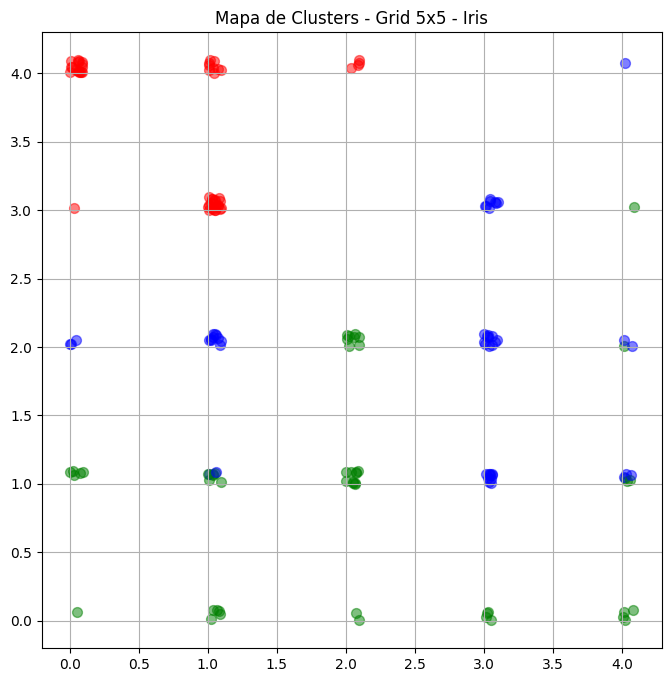

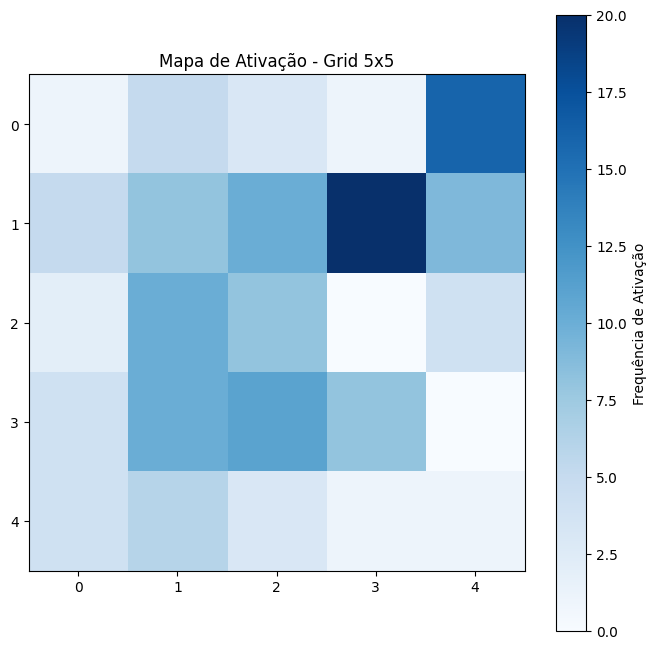

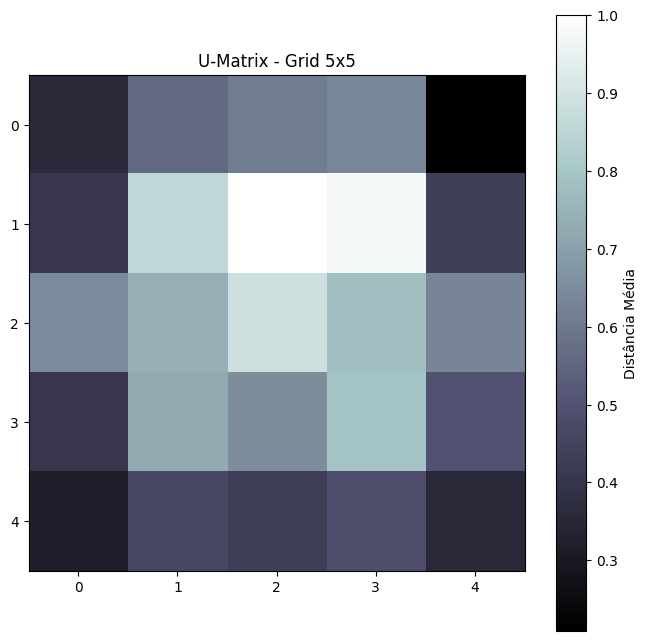

Treinando SOM com Grid 6x6 e sigma = 0.7071
Silhouette Score: 0.3083


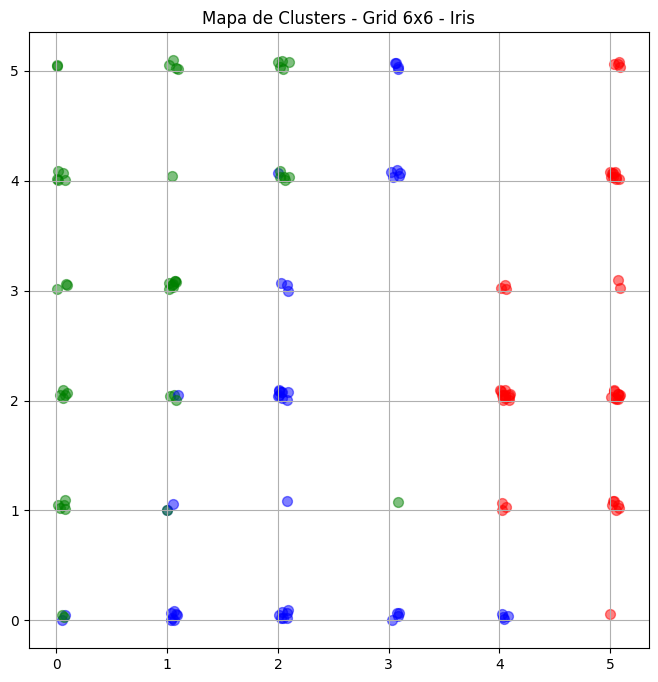

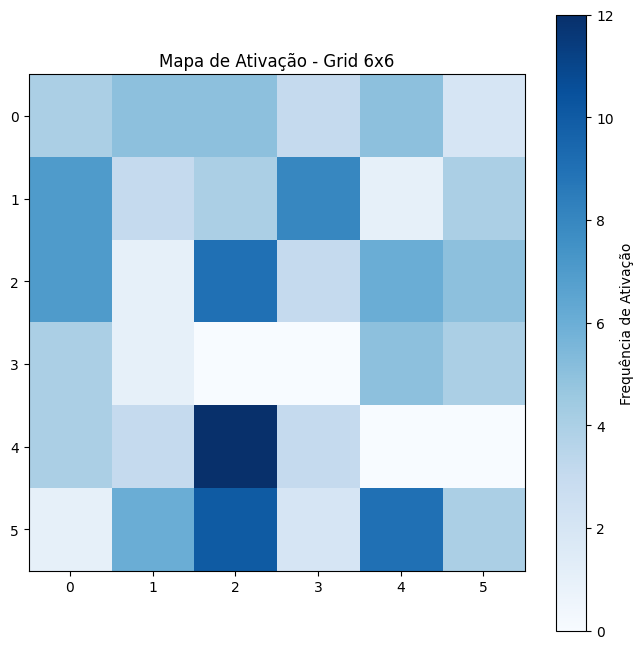

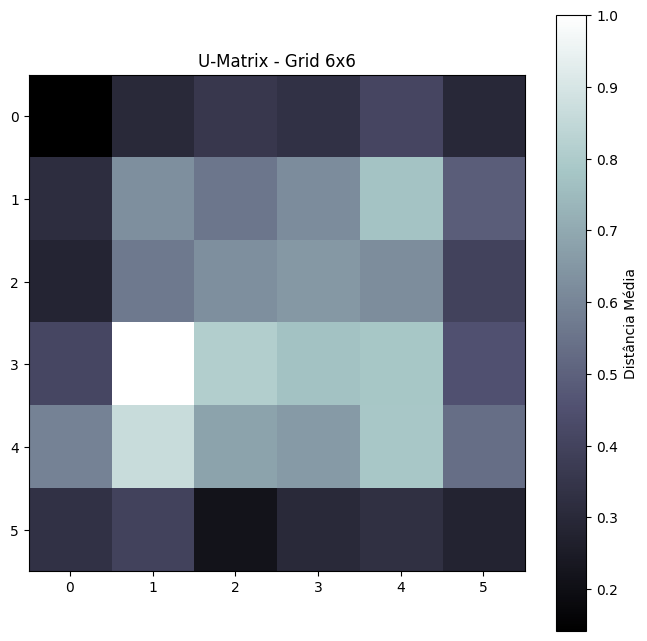

Treinando SOM com Grid 8x8 e sigma = 0.9899
Silhouette Score: -0.0214


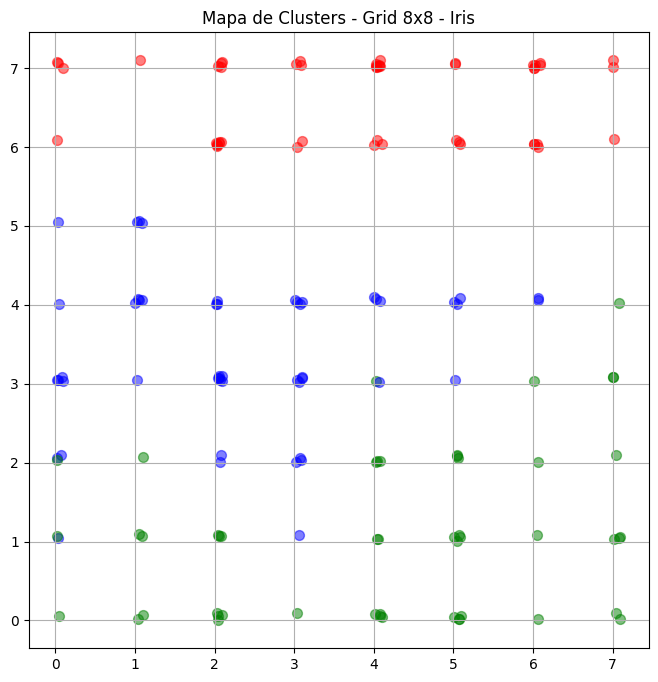

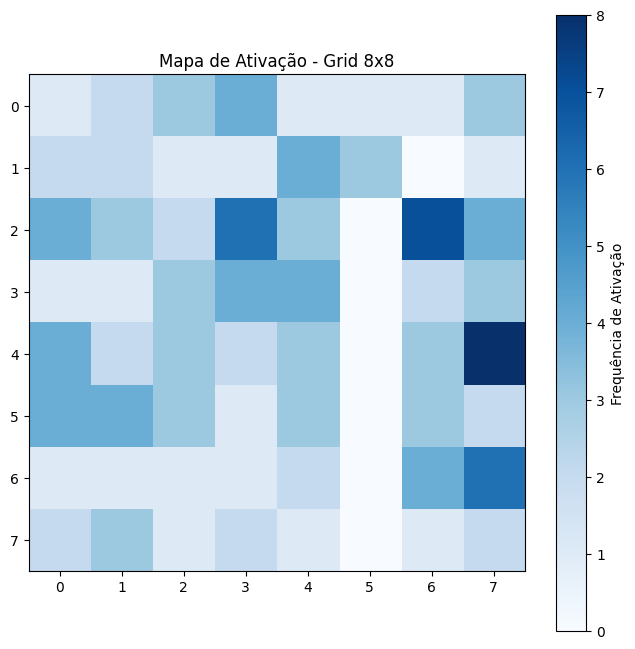

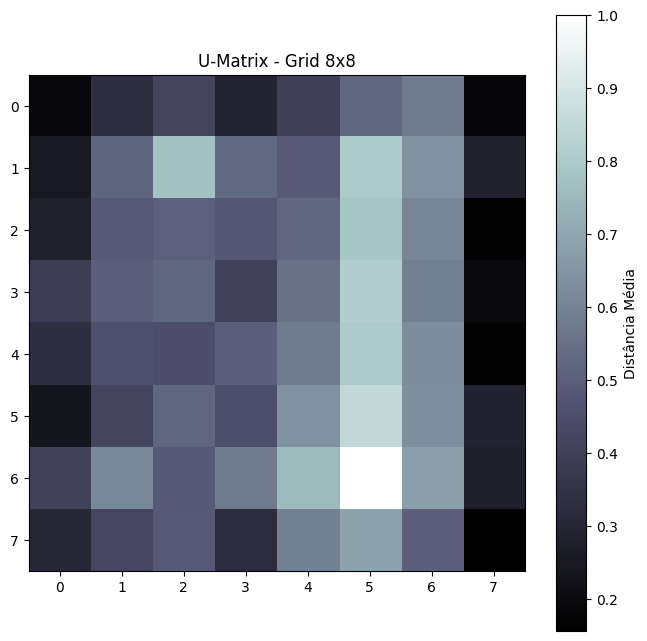

Treinando SOM com Grid 10x10 e sigma = 1.2728
Silhouette Score: -0.0402


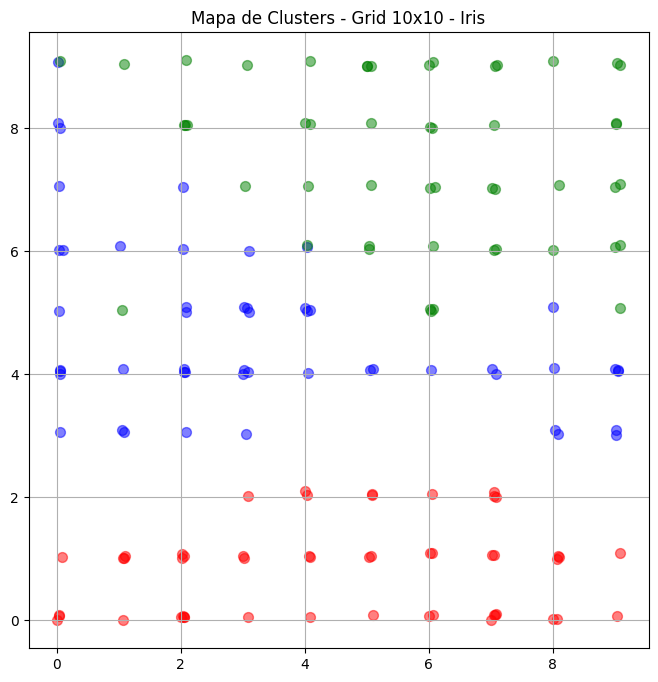

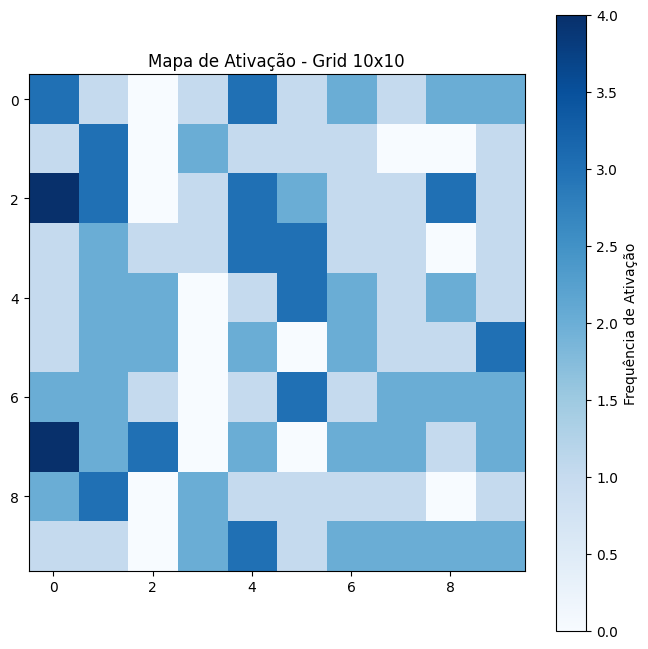

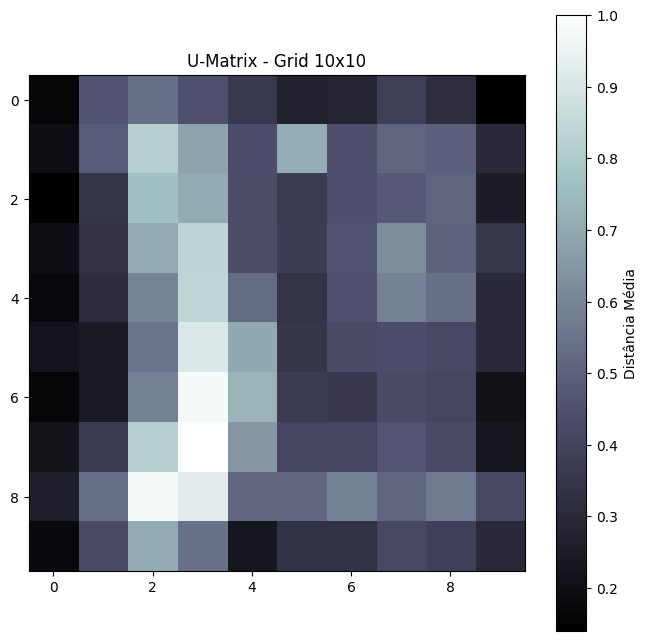

Treinando SOM com Grid 20x20 e sigma = 2.6870
Silhouette Score: -0.0549


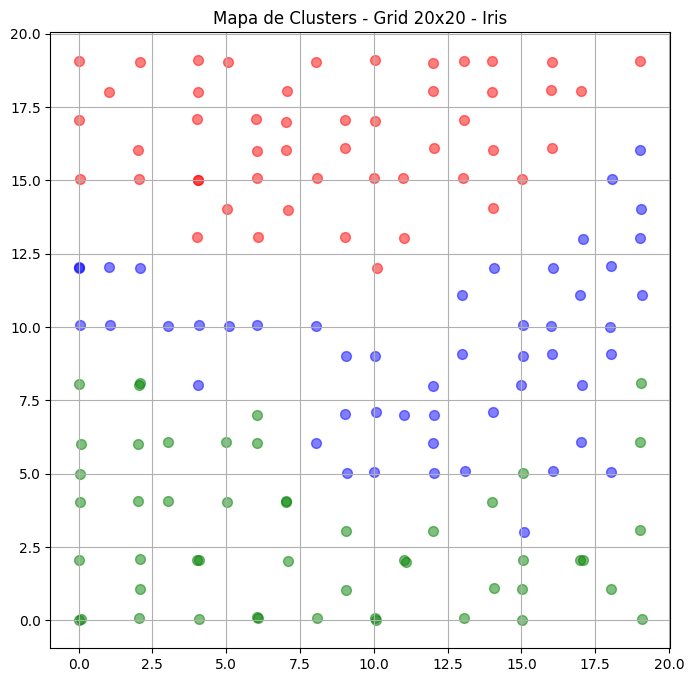

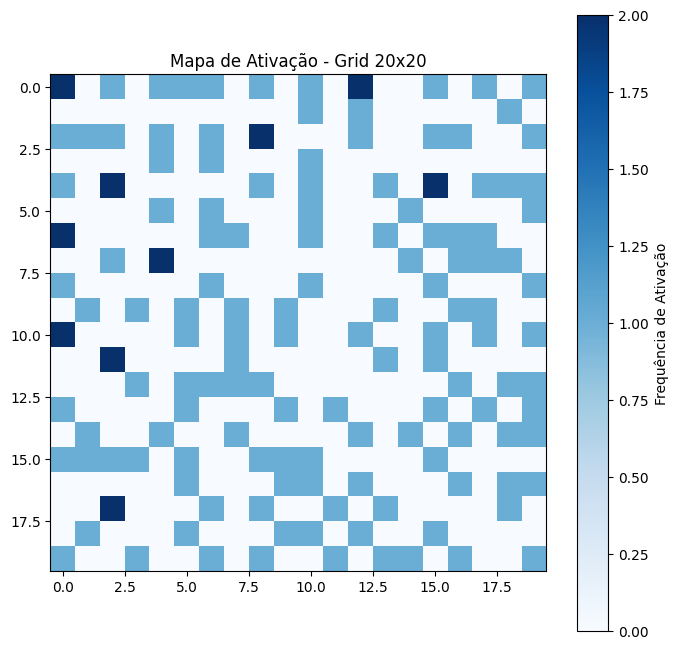

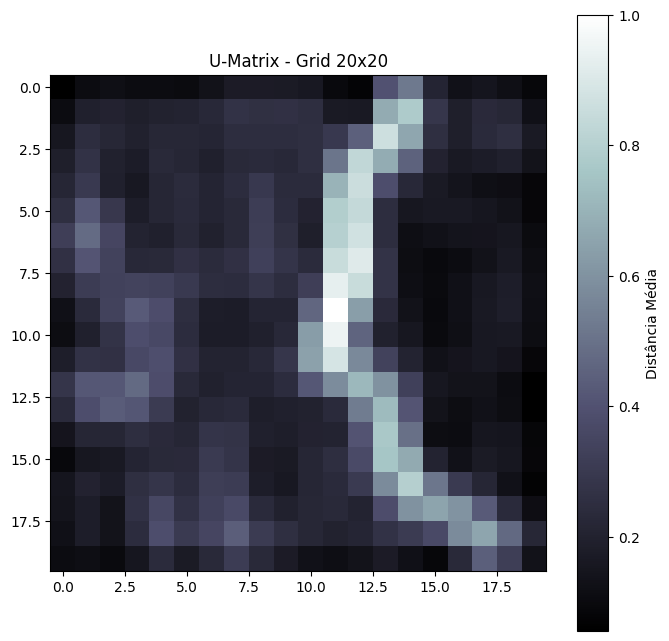

  Grid Size     Sigma  Silhouette Score
1       6x6  0.707107          0.308293
0       5x5  0.565685          0.094728
2       8x8  0.989949         -0.021356
3     10x10  1.272792         -0.040248
4     20x20  2.687006         -0.054879


In [24]:
# 📥 Carregar o Dataset Iris
from sklearn.datasets import load_iris

iris = load_iris()
x_train = iris.data  # Dados (features)
y_train = iris.target  # Classes (rótulos)

# 🔄 Pré-processamento: normalizar os dados
x_train_normalized = MinMaxScaler().fit_transform(x_train)  

# 📦 Parâmetros fixos
iterations = 100000  # Número de iterações
learning_rate = 0.5  # Taxa de aprendizado

# 🔄 Diferentes tamanhos de grids
grid_sizes = [5, 6, 8, 10, 20]

# Lista para armazenar os resultados
results = []

# 🎨 Funções de plot

def plot_som_with_colors(som, data, labels, grid_size, sample_size=150):
    # Ajustando cores para 3 classes do Iris
    class_colors = ['red', 'blue', 'green']
    
    plt.figure(figsize=(8, 8))

    # Selecionar uma amostra aleatória de 150 pontos (limite do Iris)
    indices = np.random.choice(len(data), sample_size, replace=False)
    
    bmus = [som.winner(data[i]) for i in indices]
    for idx, (x, y) in enumerate(bmus):
        label = labels[indices[idx]]
        plt.scatter(x + np.random.rand() * 0.1, 
                    y + np.random.rand() * 0.1,
                    color=class_colors[label], alpha=0.5, s=50)
    
    plt.title(f"Mapa de Clusters - Grid {grid_size}x{grid_size} - Iris")
    plt.grid(True)
    plt.show()

def plot_activation_map(som, data, grid_size):
    activation_map = np.zeros(som._weights.shape[:2])
    for sample in data:
        bmu = som.winner(sample)
        activation_map[bmu] += 1

    plt.figure(figsize=(8, 8))
    plt.imshow(activation_map, cmap='Blues')
    plt.colorbar(label='Frequência de Ativação')
    plt.title(f"Mapa de Ativação - Grid {grid_size}x{grid_size}")
    plt.grid(False)
    plt.show()

def plot_u_matrix(som, grid_size):
    u_matrix = som.distance_map()
    plt.figure(figsize=(8, 8))
    plt.imshow(u_matrix, cmap='bone')
    plt.colorbar(label='Distância Média')
    plt.title(f"U-Matrix - Grid {grid_size}x{grid_size}")
    plt.grid(False)
    plt.show()

# 🔄 Loop para testar diferentes tamanhos de grid
for size in grid_sizes:
    m, n = size, size  # Definindo o tamanho do grid

    # 📏 Calcular a distância máxima no grid
    d_max = np.sqrt((m - 1)**2 + (n - 1)**2)

    # 🔧 Definir sigma como 20% da distância máxima
    sigma = 0.1 * d_max

    print(f"Treinando SOM com Grid {m}x{n} e sigma = {sigma:.4f}")
    
    # Instanciar e treinar a SOM
    som = MiniSom(x=m, y=n, input_len=x_train_normalized.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')
    som.random_weights_init(x_train_normalized)
    som.train_random(data=x_train_normalized, num_iteration=iterations)
    
    # Coletar BMUs
    bmu_indices = np.array([som.winner(sample) for sample in x_train_normalized])
    bmu_flat = bmu_indices[:, 0] * som._weights.shape[1] + bmu_indices[:, 1]
    
    # Calcular o Silhouette Score
    score = silhouette_score(bmu_flat.reshape(-1, 1), y_train)
    print(f"Silhouette Score: {score:.4f}")
    
    # Armazenar resultados
    results.append({'Grid Size': f'{m}x{n}', 'Sigma': sigma, 'Silhouette Score': score})
    
    # Plotar gráficos para cada grid
    plot_som_with_colors(som, x_train_normalized, y_train, size)
    plot_activation_map(som, x_train_normalized, size)
    plot_u_matrix(som, size)

# 📊 Tabela de comparação dos Silhouette Scores
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
print(results_df)

## Análise por Configuração

### **1. Grid 5x5 (Sigma = 0.5657)**
- **Mapa de Clusters**:
  - Os clusters estão bem definidos, mas há sobreposição entre as classes verde (classe 2) e azul (classe 1).
- **Mapa de Ativação**:
  - A ativação é razoavelmente uniforme, com algumas células recebendo mais dados.
- **U-Matrix**:
  - As fronteiras entre os clusters são claras, mas a granularidade é limitada pelo tamanho pequeno do grid.
- **Silhouette Score**: **0.0947**
  - Reflete uma separação fraca entre as classes, mas com alguma organização.

---

### **2. Grid 6x6 (Sigma = 0.7071)**
- **Mapa de Clusters**:
  - Excelente separação entre as classes, com menos sobreposição em comparação ao grid 5x5.
  - A classe vermelha (classe 0) está bem separada das outras.
- **Mapa de Ativação**:
  - Frequência de ativação equilibrada, com poucas células subutilizadas.
- **U-Matrix**:
  - As fronteiras entre clusters são bem definidas, indicando boa organização dos dados.
- **Silhouette Score**: **0.3083**
  - O melhor valor obtido, confirmando a boa separação entre os clusters.

---

### **3. Grid 8x8 (Sigma = 0.9899)**
- **Mapa de Clusters**:
  - A separação entre as classes começa a diminuir. Há maior dispersão espacial dos dados.
- **Mapa de Ativação**:
  - Ativações menos homogêneas, com algumas células subutilizadas.
- **U-Matrix**:
  - As fronteiras entre clusters tornam-se menos evidentes, indicando menor definição.
- **Silhouette Score**: **-0.0214**
  - Um valor negativo, sugerindo confusão na separação dos clusters.

---

### **4. Grid 10x10 (Sigma = 1.2728)**
- **Mapa de Clusters**:
  - A separação das classes é ainda mais fraca, com maior sobreposição entre as classes azul (classe 1) e verde (classe 2).
- **Mapa de Ativação**:
  - Grande número de células subutilizadas, com ativação dispersa.
- **U-Matrix**:
  - As fronteiras entre clusters estão diluídas, com pouca granularidade.
- **Silhouette Score**: **-0.0402**
  - A separação é pobre, refletindo a confusão nos clusters.

---

### **5. Grid 20x20 (Sigma = 2.6870)**
- **Mapa de Clusters**:
  - As classes perdem completamente a definição, com forte dispersão dos dados no grid.
- **Mapa de Ativação**:
  - Grande parte do grid não é ativada, indicando subutilização extrema dos neurônios.
- **U-Matrix**:
  - As fronteiras entre clusters são quase inexistentes.
- **Silhouette Score**: **-0.0549**
  - O pior resultado, indicando confusão total entre os clusters.

---

## Conclusões

1. **Melhor Configuração**:
   - O grid **6x6** com **sigma = 0.7071** apresentou o melhor equilíbrio entre separação dos clusters e organização espacial, com o maior Silhouette Score (**0.3083**).

2. **Impacto do Tamanho do Grid**:
   - Grids muito pequenos (5x5) limitam a granularidade, levando a sobreposição entre clusters.
   - Grids muito grandes (10x10, 20x20) dispersam os dados e subutilizam os neurônios, resultando em confusão e menores Silhouette Scores.

3. **Impacto do Sigma**:
   - Valores de sigma mais baixos (relativos ao tamanho do grid) ajudam a manter os clusters organizados.
   - Sigma muito alto (especialmente em grids grandes) dilui as fronteiras entre os clusters.
